# **Libraries**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# **Exploratory Data Analysis**


In [2]:
# Reading the data as it came in separate files

file1 = pd.read_excel("AMR_InsuranceType.xlsx")
file2 = pd.read_excel("AMR_infections.xlsx")
file3 = pd.read_excel("AMR_patient_history.xlsx")
file4 = pd.read_excel("AMR_prescriptions.xlsx")

In [3]:
# Displaying column names for each file

print("\nFile 1 columns: ", file1.columns)

print("\nFile 2 columns: ", file2.columns)

print("\nFile 3 columns: ", file3.columns)

print("\nFile 4 columns: ", file4.columns)


File 1 columns:  Index(['PatientID', 'InsuranceType'], dtype='object')

File 2 columns:  Index(['PatientID', 'Age', 'Gender', 'Bacteria', 'Specimen type',
       'Sensitivity result', 'AdmissionPeriodDays', 'Health facility name'],
      dtype='object')

File 3 columns:  Index(['PatientID', 'Name of Illness', 'ProblemPriority',
       'Date Time Diagnosis'],
      dtype='object')

File 4 columns:  Index(['PatientID', 'Drug generic name', 'administration method', 'Dosage ',
       'Schedule', 'Start Date', 'End date'],
      dtype='object')


In [4]:
file2.head(5)

,PatientID,Age,Gender,Bacteria,Specimen type,Sensitivity result,AdmissionPeriodDays,Health facility name
0,476613,8,f,Escherichia coli,Urine,S,5,Princess Rahma Hospital
1,479971,8,f,Escherichia coli,Urine,S,2,Princess Rahma Hospital
2,1035887,9,f,Escherichia coli,Urine,S,3,Princess Rahma Hospital
3,2659788,1m,m,Escherichia coli,Urine,I,8,Princess Rahma Hospital
4,2473494,4m,m,Escherichia coli,Urine,S,4,Princess Rahma Hospital


## **Locating missing values**

In [5]:
file1.isnull().sum()

PatientID        0
InsuranceType    0
dtype: int64

In [6]:
file2.isnull().sum()

PatientID               0
Age                     0
Gender                  0
Bacteria                0
Specimen type           0
Sensitivity result      0
AdmissionPeriodDays     0
Health facility name    0
dtype: int64

In [7]:
file3.isnull().sum()

PatientID                  0
Name of Illness           88
ProblemPriority        47683
Date Time Diagnosis        0
dtype: int64

In [8]:
file4.isnull().sum()

PatientID                 0
Drug generic name         0
administration method     0
Dosage                   36
Schedule                  0
Start Date                0
End date                  0
dtype: int64

In [9]:
file3=file3.drop("ProblemPriority",axis=1)

In [10]:
column_names = file3.columns
print(column_names)

Index(['PatientID', 'Name of Illness', 'Date Time Diagnosis'], dtype='object')


In [11]:
file4=file4.dropna()

In [12]:
file4.isnull().sum()

PatientID                0
Drug generic name        0
administration method    0
Dosage                   0
Schedule                 0
Start Date               0
End date                 0
dtype: int64

In [13]:
file4['Drug generic name'].unique()

array(['INSULIN REG (ACTRAPID) 100IU/M', 'GEMFIBROZIL 600MG TAB,ORAL',
       'METFORMIN HCL 850MG TAB,ORAL', 'ASPIRIN 100MG TAB,ORAL',
       'ATORVASTATIN 20MG TAB,ORAL', 'IPRATROPIUM 500MCG/SALBUT 3MG,',
       'PARACETAMOL 1GM/VIAL INJ', 'OMEPRAZOLE 20MG CAP,ORAL,EC',
       'FOLIC ACID 5MG TAB,ORAL', 'VITAMIN B COMPLEX TAB,ORAL',
       'NIFEDIPINE 20MG TAB,ORAL', 'ENOXAPARIN 4000 IU PFS (0.4ML)',
       'LANSOPRAZOLE 30MG CAP,ORAL,EC', 'VALSARTAN 160MG TAB,ORAL',
       'BETAHISTINE 16MG TAB,ORAL', 'FENOFIBRATE 200MG CAP,ORAL',
       'CEFTRIAXONE SODIUM 1GM/VIAL IN', 'OMEPRAZOLE 40MG/VIAL INJ',
       'TAMSULOSIN HCL 0.4MG CAP,ORAL', 'PIPERACILLIN/TAZOBACTAM 4.5G/V',
       'MAGNESIUM SULFATE 100MG/ML 10M', 'ENOXAPARIN 8000 IU PFS (0.8ML)',
       'CILASTIN/IMIPENEM 500/500MG VI', 'CEFUROXIME SODIUM 750MG/VIAL I',
       'METRONIDAZOLE 500MG/VIAL INJ [', 'ZZ MEPERIDINE HCL 100MG/ML INJ',
       'DICLOFENAC SODIUM 25MG/ML INJ ', 'RANITIDINE HCL 50MG/2ML INJ',
       'HYDROCORTISO

## **Merging Files**

In [14]:
# Merging the files based on the PateintID column
merged = pd.merge(file1, file2, on='PatientID', how='inner')
merged = pd.merge(merged, file3, on='PatientID', how='inner')
merged = pd.merge(merged, file4, on='PatientID', how='inner')
merged

,PatientID,InsuranceType,Age,Gender,Bacteria,Specimen type,Sensitivity result,AdmissionPeriodDays,Health facility name,Name of Illness,Date Time Diagnosis,Drug generic name,administration method,Dosage,Schedule,Start Date,End date
0,175,Above 60 yrs,81,m,Escherichia coli,Urine,S,2,Al-Basheer Hospital,DIABETES MELLITUS WITHOUT MENTION OF COMPLICAT...,2011-07-19,INSULIN REG (ACTRAPID) 100IU/M,SUBCUTANEOUS,SLIDING SCALE,IBC,2017-09-30 00:00:00,2017-10-01
1,175,Above 60 yrs,81,m,Escherichia coli,Urine,S,2,Al-Basheer Hospital,DIABETES MELLITUS WITHOUT MENTION OF COMPLICAT...,2011-07-19,"GEMFIBROZIL 600MG TAB,ORAL",ORAL,600MG,BID,2017-09-30 00:00:00,2017-10-01
2,175,Above 60 yrs,81,m,Escherichia coli,Urine,S,2,Al-Basheer Hospital,DIABETES MELLITUS WITHOUT MENTION OF COMPLICAT...,2011-07-19,"METFORMIN HCL 850MG TAB,ORAL",ORAL,850MG,BID,2017-09-30 00:00:00,2017-10-01
3,175,Above 60 yrs,81,m,Escherichia coli,Urine,S,2,Al-Basheer Hospital,DIABETES MELLITUS WITHOUT MENTION OF COMPLICAT...,2011-07-19,"ASPIRIN 100MG TAB,ORAL",ORAL,100MG,QDAY,2017-09-30 00:00:00,2017-10-01
4,175,Above 60 yrs,81,m,Escherichia coli,Urine,S,2,Al-Basheer Hospital,DIABETES MELLITUS WITHOUT MENTION OF COMPLICAT...,2011-07-19,"ATORVASTATIN 20MG TAB,ORAL",ORAL,20MG,QHS,2017-09-30 00:00:00,2017-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8748335,4545129,Below 6 yrs,2m,f,Escherichia coli,Urine,S,1,Princess Rahma Hospital,STAPHYLOCOCCAL FOOD POISONING,2022-05-18,SALBUTAMOL 5MG/ML INHALATION S,INHALATION,0.5ML 0.5%,Q6H,2020-10-06 00:00:00,2020-10-07
8748336,4545129,Below 6 yrs,2m,f,Escherichia coli,Urine,S,1,Princess Rahma Hospital,Chronic tonsillitis,2023-07-25,CEFTRIAXONE SODIUM 1GM/VIAL IN,IV PIGGYBACK,250 MG,Q12H,2019-03-12 00:00:00,2019-03-13
8748337,4545129,Below 6 yrs,2m,f,Escherichia coli,Urine,S,1,Princess Rahma Hospital,Chronic tonsillitis,2023-07-25,CEFTRIAXONE SODIUM 1GM/VIAL IN,IV PIGGYBACK,500 MG,Q12H,2020-10-06 00:00:00,2020-10-07
8748338,4545129,Below 6 yrs,2m,f,Escherichia coli,Urine,S,1,Princess Rahma Hospital,Chronic tonsillitis,2023-07-25,PARACETAMOL 250MG SUPP,RECTAL,250MG,Q6H,2020-10-06 00:00:00,2020-10-07


In [15]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8748340 entries, 0 to 8748339
Data columns (total 17 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   PatientID              int64         
 1   InsuranceType          object        
 2   Age                    object        
 3   Gender                 object        
 4   Bacteria               object        
 5   Specimen type          object        
 6   Sensitivity result     object        
 7   AdmissionPeriodDays    int64         
 8   Health facility name   object        
 9   Name of Illness        object        
 10  Date Time Diagnosis    datetime64[ns]
 11  Drug generic name      object        
 12  administration method  object        
 13  Dosage                 object        
 14  Schedule               object        
 15  Start Date             object        
 16  End date               datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(13)
memory usage: 1.1+ GB


In [16]:
merged.describe()

,PatientID,AdmissionPeriodDays,Date Time Diagnosis,End date
count,8.748340e+06,8.748340e+06,8748340,8748340
mean,2.145957e+06,1.949204e+01,2020-11-16 04:32:13.459011840,2021-03-30 07:21:39.562660864
min,1.750000e+02,0.000000e+00,2011-01-03 00:00:00,2011-03-21 00:00:00
25%,8.284630e+05,6.000000e+00,2018-11-08 00:00:00,2019-08-29 00:00:00
50%,2.637654e+06,1.100000e+01,2021-08-29 00:00:00,2021-11-17 00:00:00
75%,2.994113e+06,2.100000e+01,2022-11-16 00:00:00,2022-12-19 00:00:00
max,4.545129e+06,4.990000e+02,2023-12-31 00:00:00,2024-02-07 00:00:00
std,1.203521e+06,2.975989e+01,NaN,NaN


In [17]:
merged.isnull().sum()

PatientID                   0
InsuranceType               0
Age                         0
Gender                      0
Bacteria                    0
Specimen type               0
Sensitivity result          0
AdmissionPeriodDays         0
Health facility name        0
Name of Illness          9423
Date Time Diagnosis         0
Drug generic name           0
administration method       0
Dosage                      0
Schedule                    0
Start Date                  0
End date                    0
dtype: int64

In [18]:
merged=merged.drop("Name of Illness",axis=1)

In [19]:
merged.isnull().sum()

PatientID                0
InsuranceType            0
Age                      0
Gender                   0
Bacteria                 0
Specimen type            0
Sensitivity result       0
AdmissionPeriodDays      0
Health facility name     0
Date Time Diagnosis      0
Drug generic name        0
administration method    0
Dosage                   0
Schedule                 0
Start Date               0
End date                 0
dtype: int64

In [20]:
merged

,PatientID,InsuranceType,Age,Gender,Bacteria,Specimen type,Sensitivity result,AdmissionPeriodDays,Health facility name,Date Time Diagnosis,Drug generic name,administration method,Dosage,Schedule,Start Date,End date
0,175,Above 60 yrs,81,m,Escherichia coli,Urine,S,2,Al-Basheer Hospital,2011-07-19,INSULIN REG (ACTRAPID) 100IU/M,SUBCUTANEOUS,SLIDING SCALE,IBC,2017-09-30 00:00:00,2017-10-01
1,175,Above 60 yrs,81,m,Escherichia coli,Urine,S,2,Al-Basheer Hospital,2011-07-19,"GEMFIBROZIL 600MG TAB,ORAL",ORAL,600MG,BID,2017-09-30 00:00:00,2017-10-01
2,175,Above 60 yrs,81,m,Escherichia coli,Urine,S,2,Al-Basheer Hospital,2011-07-19,"METFORMIN HCL 850MG TAB,ORAL",ORAL,850MG,BID,2017-09-30 00:00:00,2017-10-01
3,175,Above 60 yrs,81,m,Escherichia coli,Urine,S,2,Al-Basheer Hospital,2011-07-19,"ASPIRIN 100MG TAB,ORAL",ORAL,100MG,QDAY,2017-09-30 00:00:00,2017-10-01
4,175,Above 60 yrs,81,m,Escherichia coli,Urine,S,2,Al-Basheer Hospital,2011-07-19,"ATORVASTATIN 20MG TAB,ORAL",ORAL,20MG,QHS,2017-09-30 00:00:00,2017-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8748335,4545129,Below 6 yrs,2m,f,Escherichia coli,Urine,S,1,Princess Rahma Hospital,2022-05-18,SALBUTAMOL 5MG/ML INHALATION S,INHALATION,0.5ML 0.5%,Q6H,2020-10-06 00:00:00,2020-10-07
8748336,4545129,Below 6 yrs,2m,f,Escherichia coli,Urine,S,1,Princess Rahma Hospital,2023-07-25,CEFTRIAXONE SODIUM 1GM/VIAL IN,IV PIGGYBACK,250 MG,Q12H,2019-03-12 00:00:00,2019-03-13
8748337,4545129,Below 6 yrs,2m,f,Escherichia coli,Urine,S,1,Princess Rahma Hospital,2023-07-25,CEFTRIAXONE SODIUM 1GM/VIAL IN,IV PIGGYBACK,500 MG,Q12H,2020-10-06 00:00:00,2020-10-07
8748338,4545129,Below 6 yrs,2m,f,Escherichia coli,Urine,S,1,Princess Rahma Hospital,2023-07-25,PARACETAMOL 250MG SUPP,RECTAL,250MG,Q6H,2020-10-06 00:00:00,2020-10-07


#**Data Preprocessing**

### **Fixing Dataset**

In [21]:
#List of antibiotic names
antibiotics = [
    'Enoxaparin 4000 IU PFS (0.4ML)', 'Ceftriaxone Sodium 1GM/VIAL IN', 'Piperacillin/Tazobactam 4.5G/V',
    'Enoxaparin 8000 IU PFS (0.8ML)', 'Cilastin/Imipenem 500/500MG VI', 'Cefuroxime Sodium 750MG/VIAL I',
    'Metronidazole 500MG/VIAL INJ','Cefotaxime Sodium 1GM/VIAL INJ','Meropenem 1GM/VIAL INJ [W]',
    'Meropenem 500MG/VIAL INJ [W]','Ceftazidime 1GM/VIAL INJ [W]','Levofloxacin 500MG/100ML, VIAL',
    'Vancomycin HCL 1GM/VIAL INJ [W]','Ciprofloxacin 0.3% SOLN, OPHT','Cefepime 1GM/VIAL INJ [W]',
    'Teicoplanin 200MG INJ [W]', 'Amoxicillin 500/Clavulan 125 T', 'Cloxacillin 500MG/VIAL INJ [A]',
    'Ampicillin 1GM/VIAL INJ [A]','Ampicillin 500MG/VIAL INJ [A]','Levofloxacin 500MG TAB, ORAL [W]',
    'Ceftriaxone Sodium 500MG/VIAL','CEFIXIME 100MG/5ML SUSP, ORAL','NITROFURAZONE 0.2% OINT, TOP TU',
    'AMOXICILLIN 1GM TAB, ORAL','CEFTIZOXIME 1GM/VIAL INJ [W]','AZTREONAM 1GM/VIAL INJ [R]',
    'CEFAZOLIN SOD 1GM/VIAL INJ [A]','CLOXACILLIN SOD 500MG/VIAL INJ [A]','AMOXICILLIN 250/CLAVULAN 125 T',
    'CEFTAZIDIME 250MG/VIAL INJ [B]','VANCOMYCIN HCL 500MG/VIAL INJ','CEFTRIAXONE SODIUM 250MG/VIAL',
    'AZITHROMYCIN 200MG/5ML SUSP,OR','CEFAZOLIN SOD 2GM/VIAL INJ [A]','CLINDAMYCIN 600MG/4ML INJ,SOLN',
    'CEFUROXIME AXETIL 125MG/5ML SU','AMPICILLIN 500MG CAP [A]','CLOXACILLIN 250MG CAP,ORAL [A]',
    'FLUCLOXACILLIN 500MG INJ [A]','LINEZOLID 2MG/ML INJ [R]','TINZAPARIN 14000 IU 0.7ML SYRI',
    'ZZPHENOBARBITAL 200MG INJ','IMMUNE GLOBULIN 1GM/VIAL INJ','LEVOFLOXACIN 250MG TAB,ORAL',
    'LINCOMYCIN 600MG/VIAL INJ [W]','IBUPROFEN 600MG TAB,ORAL','RIFAMPIN 100MG/5ML SYRUP,ORAL',
    'AMIKACIN 250MG/VIAL INJ [A]','FLUCLOXACILLIN 1GM INJ [A]','FLUCLOXACILLIN 250MG TAB,ORAL'
]


In [22]:
# Function to check if the drug in the list is an antibiotic

def is_antibiotic(medicine):
    for antibiotic in antibiotics:
        if antibiotic in medicine:
            return True
    return False

# Creating a DataFrame containing only the rows where the drug is indeed an antibiotic

df_with_antibiotics = merged[merged['Drug generic name'].apply(is_antibiotic)]


# df_with_antibiotics.to_excel('patients_with_antibiotics.xlsx', index=False)

In [23]:
df_with_antibiotics.head(5)

,PatientID,InsuranceType,Age,Gender,Bacteria,Specimen type,Sensitivity result,AdmissionPeriodDays,Health facility name,Date Time Diagnosis,Drug generic name,administration method,Dosage,Schedule,Start Date,End date
21788,12332,0,52,m,Pseudomonas aeruginosa,Vagina,S,15,Prince Hamzah Hospital,2011-01-27,VANCOMYCIN HCL 500MG/VIAL INJ,INTRAVENOUS,500MG/1VIAL,Q24H,2018-02-07 00:00:00,2018-02-08
22044,12332,0,52,m,Pseudomonas aeruginosa,Vagina,S,15,Prince Hamzah Hospital,2011-01-27,VANCOMYCIN HCL 500MG/VIAL INJ,INTRAVENOUS,500MG/1VIAL,Q24H,2018-02-07 00:00:00,2018-02-08
22300,12332,0,52,m,Klebsiella oxytoca,Sputum,S,11,Prince Hamzah Hospital,2011-01-27,VANCOMYCIN HCL 500MG/VIAL INJ,INTRAVENOUS,500MG/1VIAL,Q24H,2018-02-07 00:00:00,2018-02-08
22556,12332,0,52,m,Klebsiella oxytoca,Sputum,S,11,Prince Hamzah Hospital,2011-01-27,VANCOMYCIN HCL 500MG/VIAL INJ,INTRAVENOUS,500MG/1VIAL,Q24H,2018-02-07 00:00:00,2018-02-08
22812,12332,0,52,m,Escherichia coli,Sputum,S,11,Prince Hamzah Hospital,2011-01-27,VANCOMYCIN HCL 500MG/VIAL INJ,INTRAVENOUS,500MG/1VIAL,Q24H,2018-02-07 00:00:00,2018-02-08


In [24]:
df_with_antibiotics.isnull().sum()

PatientID                0
InsuranceType            0
Age                      0
Gender                   0
Bacteria                 0
Specimen type            0
Sensitivity result       0
AdmissionPeriodDays      0
Health facility name     0
Date Time Diagnosis      0
Drug generic name        0
administration method    0
Dosage                   0
Schedule                 0
Start Date               0
End date                 0
dtype: int64

In [25]:
df_with_antibiotics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141849 entries, 21788 to 8748312
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   PatientID              141849 non-null  int64         
 1   InsuranceType          141849 non-null  object        
 2   Age                    141849 non-null  object        
 3   Gender                 141849 non-null  object        
 4   Bacteria               141849 non-null  object        
 5   Specimen type          141849 non-null  object        
 6   Sensitivity result     141849 non-null  object        
 7   AdmissionPeriodDays    141849 non-null  int64         
 8   Health facility name   141849 non-null  object        
 9   Date Time Diagnosis    141849 non-null  datetime64[ns]
 10  Drug generic name      141849 non-null  object        
 11  administration method  141849 non-null  object        
 12  Dosage                 141849 non-null  obje

In [26]:
df_with_antibiotics['Bacteria'].value_counts()

Bacteria
Escherichia coli                                   40175
Klebsiella pneumoniae                              29189
Pseudomonas aeruginosa                             13761
Staphylococcus (coagulase-negative)                12668
Acinetobacter baumannii                            11178
Enterobacter cloacae                               10419
Staphylococcus aureus                              10200
Serratia marcescens                                 2542
Proteus mirabilis                                   2067
Enterococcus spp.                                   1601
Citrobacter freundii                                 947
Enterococcus faecalis                                942
Klebsiella oxytoca                                   715
Proteus spp.                                         665
Streptococcus spp. (Group Viridans α-hemolysis)      665
Streptococcus agalactiae (Group B β-hemolysis)       562
Klebsiella aerogenes                                 553
Burkholderia cepacia  

In [27]:
df_with_antibiotics['Drug generic name'].nunique()

24

In [28]:
column_names = df_with_antibiotics.columns
print(column_names)

Index(['PatientID', 'InsuranceType', 'Age', 'Gender', 'Bacteria',
       'Specimen type', 'Sensitivity result', 'AdmissionPeriodDays',
       'Health facility name', 'Date Time Diagnosis', 'Drug generic name',
       'administration method', 'Dosage ', 'Schedule', 'Start Date',
       'End date'],
      dtype='object')


In [29]:
# Antibiotic check
df_with_antibiotics['Drug generic name'].unique()

array(['VANCOMYCIN HCL 500MG/VIAL INJ ', 'CEFTIZOXIME 1GM/VIAL INJ [W]',
       'AZTREONAM 1GM/VIAL INJ [R]', 'CEFAZOLIN SOD 1GM/VIAL INJ [A]',
       'AMOXICILLIN 250/CLAVULAN 125 T', 'CEFTRIAXONE SODIUM 250MG/VIAL ',
       'AZITHROMYCIN 200MG/5ML SUSP,OR', 'CEFAZOLIN SOD 2GM/VIAL INJ [A]',
       'FLUCLOXACILLIN 500MG INJ [A]', 'CLOXACILLIN 250MG CAP,ORAL [A]',
       'TINZAPARIN 14000 IU 0.7ML SYRI', 'CLINDAMYCIN 600MG/4ML INJ,SOLN',
       'CEFUROXIME AXETIL 125MG/5ML SU', 'LINEZOLID 2MG/ML INJ [R]',
       'ZZPHENOBARBITAL 200MG INJ', 'IMMUNE GLOBULIN 1GM/VIAL INJ',
       'AMPICILLIN 500MG CAP [A]', 'LEVOFLOXACIN 250MG TAB,ORAL',
       'LINCOMYCIN 600MG/VIAL INJ [W]', 'IBUPROFEN 600MG TAB,ORAL',
       'RIFAMPIN 100MG/5ML SYRUP,ORAL ', 'AMIKACIN 250MG/VIAL INJ [A]',
       'FLUCLOXACILLIN 1GM INJ [A]', 'FLUCLOXACILLIN 250MG TAB,ORAL '],
      dtype=object)

## **Duration Column**

In [30]:
df_with_antibiotics['Start Date'] = pd.to_datetime(df_with_antibiotics['Start Date'])
df_with_antibiotics['End date'] = pd.to_datetime(df_with_antibiotics['End date'])

df_with_antibiotics['Duration'] = df_with_antibiotics['End date'] - df_with_antibiotics['Start Date']
df_with_antibiotics

<ipython-input-30-509b6d6a79b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_antibiotics['Start Date'] = pd.to_datetime(df_with_antibiotics['Start Date'])
<ipython-input-30-509b6d6a79b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_antibiotics['End date'] = pd.to_datetime(df_with_antibiotics['End date'])
<ipython-input-30-509b6d6a79b7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,PatientID,InsuranceType,Age,Gender,Bacteria,Specimen type,Sensitivity result,AdmissionPeriodDays,Health facility name,Date Time Diagnosis,Drug generic name,administration method,Dosage,Schedule,Start Date,End date,Duration
21788,12332,0,52,m,Pseudomonas aeruginosa,Vagina,S,15,Prince Hamzah Hospital,2011-01-27,VANCOMYCIN HCL 500MG/VIAL INJ,INTRAVENOUS,500MG/1VIAL,Q24H,2018-02-07,2018-02-08,1 days
22044,12332,0,52,m,Pseudomonas aeruginosa,Vagina,S,15,Prince Hamzah Hospital,2011-01-27,VANCOMYCIN HCL 500MG/VIAL INJ,INTRAVENOUS,500MG/1VIAL,Q24H,2018-02-07,2018-02-08,1 days
22300,12332,0,52,m,Klebsiella oxytoca,Sputum,S,11,Prince Hamzah Hospital,2011-01-27,VANCOMYCIN HCL 500MG/VIAL INJ,INTRAVENOUS,500MG/1VIAL,Q24H,2018-02-07,2018-02-08,1 days
22556,12332,0,52,m,Klebsiella oxytoca,Sputum,S,11,Prince Hamzah Hospital,2011-01-27,VANCOMYCIN HCL 500MG/VIAL INJ,INTRAVENOUS,500MG/1VIAL,Q24H,2018-02-07,2018-02-08,1 days
22812,12332,0,52,m,Escherichia coli,Sputum,S,11,Prince Hamzah Hospital,2011-01-27,VANCOMYCIN HCL 500MG/VIAL INJ,INTRAVENOUS,500MG/1VIAL,Q24H,2018-02-07,2018-02-08,1 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8748272,4166142,Above 60 yrs,44,f,Escherichia coli,Urine,I,3,Al-Karak Hospital,2022-07-18,CEFAZOLIN SOD 1GM/VIAL INJ [A],IV PIGGYBACK,1GM/1VIAL,Q8H,2019-02-13,2019-02-14,1 days
8748291,4166142,Above 60 yrs,44,f,Escherichia coli,Urine,I,3,Al-Karak Hospital,2023-08-16,CEFAZOLIN SOD 1GM/VIAL INJ [A],IV PIGGYBACK,1GM/1VIAL,Q8H,2019-02-12,2019-02-16,4 days
8748293,4166142,Above 60 yrs,44,f,Escherichia coli,Urine,I,3,Al-Karak Hospital,2023-08-16,CEFAZOLIN SOD 1GM/VIAL INJ [A],IV PIGGYBACK,1GM/1VIAL,Q8H,2019-02-13,2019-02-14,1 days
8748310,4166142,Above 60 yrs,44,f,Escherichia coli,Urine,I,3,Al-Karak Hospital,2023-08-16,CEFAZOLIN SOD 1GM/VIAL INJ [A],IV PIGGYBACK,1GM/1VIAL,Q8H,2019-02-12,2019-02-16,4 days


## **Renaming columns**

In [31]:
df_with_antibiotics['Schedule'].unique()

array(['Q24H', 'Q12H', 'AS DIRECTED', 'STAT', 'EOD', '3/W', 'TID', 'Q6H',
       'Q8H', 'NOW', 'BID', 'QDAY', 'ONCE', 'Q48H', 'AC', 'Q3W', '2/W',
       'QWEEK', 'SU-MO-TU-WE-TH-FR-SA@06-18', 'BID@12', 'QTHURS',
       'BID AT 12', 'Q4H', 'PRN', 'Q12H PRN', 'QPM', 'NOON', 'QTUESDAY',
       'MO-WE-SA@1200', 'EOD PRN'], dtype=object)

In [32]:
column_mapping = {
    "Drug generic name": "Antibiotics",
    "Specimen type": "SpecimenType",
    "Sensitivity result": "SensitivityResult",
    "Health facility name": "Hospital",
    "Name of Illness":"Illness",
    "Date Time Diagnosis":"DiagnosisDateTime",
    "administration method":"AdministrationMethod",
    "Dosage ":"Dosage",
    "Start Date":"StartDate"        ,
    "End date":"EndDate",
    "AdmissionPeriodDays":"AdmissionPeriod",
    "Schedule":"Prescription" ,
    "Duration":"TreatmentTime"
}

# Rename columns using rename() function

df_with_antibiotics.rename(columns=column_mapping, inplace=True)

<ipython-input-32-b4d4ae50efdc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_antibiotics.rename(columns=column_mapping, inplace=True)


In [33]:
df=df_with_antibiotics

In [34]:
df_with_antibiotics

,PatientID,InsuranceType,Age,Gender,Bacteria,SpecimenType,SensitivityResult,AdmissionPeriod,Hospital,DiagnosisDateTime,Antibiotics,AdministrationMethod,Dosage,Prescription,StartDate,End date,TreatmentTime
21788,12332,0,52,m,Pseudomonas aeruginosa,Vagina,S,15,Prince Hamzah Hospital,2011-01-27,VANCOMYCIN HCL 500MG/VIAL INJ,INTRAVENOUS,500MG/1VIAL,Q24H,2018-02-07,2018-02-08,1 days
22044,12332,0,52,m,Pseudomonas aeruginosa,Vagina,S,15,Prince Hamzah Hospital,2011-01-27,VANCOMYCIN HCL 500MG/VIAL INJ,INTRAVENOUS,500MG/1VIAL,Q24H,2018-02-07,2018-02-08,1 days
22300,12332,0,52,m,Klebsiella oxytoca,Sputum,S,11,Prince Hamzah Hospital,2011-01-27,VANCOMYCIN HCL 500MG/VIAL INJ,INTRAVENOUS,500MG/1VIAL,Q24H,2018-02-07,2018-02-08,1 days
22556,12332,0,52,m,Klebsiella oxytoca,Sputum,S,11,Prince Hamzah Hospital,2011-01-27,VANCOMYCIN HCL 500MG/VIAL INJ,INTRAVENOUS,500MG/1VIAL,Q24H,2018-02-07,2018-02-08,1 days
22812,12332,0,52,m,Escherichia coli,Sputum,S,11,Prince Hamzah Hospital,2011-01-27,VANCOMYCIN HCL 500MG/VIAL INJ,INTRAVENOUS,500MG/1VIAL,Q24H,2018-02-07,2018-02-08,1 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8748272,4166142,Above 60 yrs,44,f,Escherichia coli,Urine,I,3,Al-Karak Hospital,2022-07-18,CEFAZOLIN SOD 1GM/VIAL INJ [A],IV PIGGYBACK,1GM/1VIAL,Q8H,2019-02-13,2019-02-14,1 days
8748291,4166142,Above 60 yrs,44,f,Escherichia coli,Urine,I,3,Al-Karak Hospital,2023-08-16,CEFAZOLIN SOD 1GM/VIAL INJ [A],IV PIGGYBACK,1GM/1VIAL,Q8H,2019-02-12,2019-02-16,4 days
8748293,4166142,Above 60 yrs,44,f,Escherichia coli,Urine,I,3,Al-Karak Hospital,2023-08-16,CEFAZOLIN SOD 1GM/VIAL INJ [A],IV PIGGYBACK,1GM/1VIAL,Q8H,2019-02-13,2019-02-14,1 days
8748310,4166142,Above 60 yrs,44,f,Escherichia coli,Urine,I,3,Al-Karak Hospital,2023-08-16,CEFAZOLIN SOD 1GM/VIAL INJ [A],IV PIGGYBACK,1GM/1VIAL,Q8H,2019-02-12,2019-02-16,4 days


In [35]:
df.rename(columns={'Duration': 'TreatmentPeriod'}, inplace=True)

<ipython-input-35-48c78009bb85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Duration': 'TreatmentPeriod'}, inplace=True)


In [36]:
df

,PatientID,InsuranceType,Age,Gender,Bacteria,SpecimenType,SensitivityResult,AdmissionPeriod,Hospital,DiagnosisDateTime,Antibiotics,AdministrationMethod,Dosage,Prescription,StartDate,End date,TreatmentTime
21788,12332,0,52,m,Pseudomonas aeruginosa,Vagina,S,15,Prince Hamzah Hospital,2011-01-27,VANCOMYCIN HCL 500MG/VIAL INJ,INTRAVENOUS,500MG/1VIAL,Q24H,2018-02-07,2018-02-08,1 days
22044,12332,0,52,m,Pseudomonas aeruginosa,Vagina,S,15,Prince Hamzah Hospital,2011-01-27,VANCOMYCIN HCL 500MG/VIAL INJ,INTRAVENOUS,500MG/1VIAL,Q24H,2018-02-07,2018-02-08,1 days
22300,12332,0,52,m,Klebsiella oxytoca,Sputum,S,11,Prince Hamzah Hospital,2011-01-27,VANCOMYCIN HCL 500MG/VIAL INJ,INTRAVENOUS,500MG/1VIAL,Q24H,2018-02-07,2018-02-08,1 days
22556,12332,0,52,m,Klebsiella oxytoca,Sputum,S,11,Prince Hamzah Hospital,2011-01-27,VANCOMYCIN HCL 500MG/VIAL INJ,INTRAVENOUS,500MG/1VIAL,Q24H,2018-02-07,2018-02-08,1 days
22812,12332,0,52,m,Escherichia coli,Sputum,S,11,Prince Hamzah Hospital,2011-01-27,VANCOMYCIN HCL 500MG/VIAL INJ,INTRAVENOUS,500MG/1VIAL,Q24H,2018-02-07,2018-02-08,1 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8748272,4166142,Above 60 yrs,44,f,Escherichia coli,Urine,I,3,Al-Karak Hospital,2022-07-18,CEFAZOLIN SOD 1GM/VIAL INJ [A],IV PIGGYBACK,1GM/1VIAL,Q8H,2019-02-13,2019-02-14,1 days
8748291,4166142,Above 60 yrs,44,f,Escherichia coli,Urine,I,3,Al-Karak Hospital,2023-08-16,CEFAZOLIN SOD 1GM/VIAL INJ [A],IV PIGGYBACK,1GM/1VIAL,Q8H,2019-02-12,2019-02-16,4 days
8748293,4166142,Above 60 yrs,44,f,Escherichia coli,Urine,I,3,Al-Karak Hospital,2023-08-16,CEFAZOLIN SOD 1GM/VIAL INJ [A],IV PIGGYBACK,1GM/1VIAL,Q8H,2019-02-13,2019-02-14,1 days
8748310,4166142,Above 60 yrs,44,f,Escherichia coli,Urine,I,3,Al-Karak Hospital,2023-08-16,CEFAZOLIN SOD 1GM/VIAL INJ [A],IV PIGGYBACK,1GM/1VIAL,Q8H,2019-02-12,2019-02-16,4 days


In [37]:
df['Antibiotics'].unique()

array(['VANCOMYCIN HCL 500MG/VIAL INJ ', 'CEFTIZOXIME 1GM/VIAL INJ [W]',
       'AZTREONAM 1GM/VIAL INJ [R]', 'CEFAZOLIN SOD 1GM/VIAL INJ [A]',
       'AMOXICILLIN 250/CLAVULAN 125 T', 'CEFTRIAXONE SODIUM 250MG/VIAL ',
       'AZITHROMYCIN 200MG/5ML SUSP,OR', 'CEFAZOLIN SOD 2GM/VIAL INJ [A]',
       'FLUCLOXACILLIN 500MG INJ [A]', 'CLOXACILLIN 250MG CAP,ORAL [A]',
       'TINZAPARIN 14000 IU 0.7ML SYRI', 'CLINDAMYCIN 600MG/4ML INJ,SOLN',
       'CEFUROXIME AXETIL 125MG/5ML SU', 'LINEZOLID 2MG/ML INJ [R]',
       'ZZPHENOBARBITAL 200MG INJ', 'IMMUNE GLOBULIN 1GM/VIAL INJ',
       'AMPICILLIN 500MG CAP [A]', 'LEVOFLOXACIN 250MG TAB,ORAL',
       'LINCOMYCIN 600MG/VIAL INJ [W]', 'IBUPROFEN 600MG TAB,ORAL',
       'RIFAMPIN 100MG/5ML SYRUP,ORAL ', 'AMIKACIN 250MG/VIAL INJ [A]',
       'FLUCLOXACILLIN 1GM INJ [A]', 'FLUCLOXACILLIN 250MG TAB,ORAL '],
      dtype=object)

## **Antibiotic Family Column**

In [38]:
# Mapping every antibiotic to its antibiotic family

antibiotic_family_mapping = {
    "VANCOMYCIN HCL 500MG/VIAL INJ ": "Glycopeptides",
    "CEFTIZOXIME 1GM/VIAL INJ [W]": "Cephalosporins",
    "CEFAZOLIN SOD 1GM/VIAL INJ [A]": "Cephalosporins",
    "AMOXICILLIN 250/CLAVULAN 125 T": "Penicillins",
    "CEFTRIAXONE SODIUM 250MG/VIAL ": "Cephalosporins",
    "AZITHROMYCIN 200MG/5ML SUSP,OR": "Macrolides",
    "CEFAZOLIN SOD 2GM/VIAL INJ [A]": "Cephalosporins",
    "LINEZOLID 2MG/ML INJ [R]": "Oxazolidinones",
    "AMPICILLIN 500MG CAP [A]": "Penicillins",
    "TINZAPARIN 14000 IU 0.7ML SYRI": "Anticoagulants",
    "LINCOMYCIN 600MG/VIAL INJ [W]": "Lincosamides",
    "AMIKACIN 250MG/VIAL INJ [A]": "Aminoglycosides",
    "FLUCLOXACILLIN 500MG INJ [A]": "Penicillins",
    "CEFUROXIME AXETIL 125MG/5ML SU": "Cephalosporins",
    "IMMUNE GLOBULIN 1GM/VIAL INJ": "Immunoglobulins",
    "LEVOFLOXACIN 250MG TAB,ORAL": "Fluoroquinolones",
}

df["Antibiotic_Family"] = df["Antibiotics"].map(antibiotic_family_mapping)
df[["Antibiotics", "Antibiotic_Family"]].head()

<ipython-input-38-0851a0697162>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Antibiotic_Family"] = df["Antibiotics"].map(antibiotic_family_mapping)


,Antibiotics,Antibiotic_Family
21788,VANCOMYCIN HCL 500MG/VIAL INJ,Glycopeptides
22044,VANCOMYCIN HCL 500MG/VIAL INJ,Glycopeptides
22300,VANCOMYCIN HCL 500MG/VIAL INJ,Glycopeptides
22556,VANCOMYCIN HCL 500MG/VIAL INJ,Glycopeptides
22812,VANCOMYCIN HCL 500MG/VIAL INJ,Glycopeptides


In [39]:
df['Antibiotic_Family'].nunique()

10

## **Age Column**

In [40]:
df['Age'].unique()

array([52, 51, 72, 68, 73, 23, 77, 81, 47, 53, 74, 70, 59, 67, 78, 80, 60,
       22, 32, 75, 30, 66, 97, 40, 43, 48, 45, 61, 28, 21, 54, 36, 20, 34,
       76, 71, 84, 63, 86, 11, 42, 41, 69, 55, 49, 65, 44, 35, 38, 79, 14,
       64, 26, 33, 56, 58, 27, 62, 25, 6, 3, 50, 12, 93, 37, 24, 82, 46,
       57, 39, 8, '1m', 18, 29, '4w', 1, 31, 4, 10, 9, '6m', 5, 88, 16,
       91, 7, 19, 95, 15, 85, 2, 83, 96, 89, '8m', '9m', '5m', '10m', 13,
       17, '2d', 87, '1w', '4m', '3m', '2m', '6d', '11m', '7m', '0d',
       '2w', '4d', '1d', 90, 92, '3w', '3d'], dtype=object)

In [41]:
# Converting the string values to numerical ones

def replace_m_w_d(age):
    if isinstance(age, str):  # Check if the value is a string
        if age[-1] in ['m', 'w', 'd'] and age[:-1].isdigit():  # Check if it ends with 'm', 'w', or 'd' and if the remaining part is numeric
            return 0
    return age  # Return the original value if it's not in the specified format

# Apply the replacement function to the Age column
df['Age'] = df['Age'].apply(replace_m_w_d)
df['Age'].unique()

<ipython-input-41-2c7a78ffdef0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].apply(replace_m_w_d)


array([52, 51, 72, 68, 73, 23, 77, 81, 47, 53, 74, 70, 59, 67, 78, 80, 60,
       22, 32, 75, 30, 66, 97, 40, 43, 48, 45, 61, 28, 21, 54, 36, 20, 34,
       76, 71, 84, 63, 86, 11, 42, 41, 69, 55, 49, 65, 44, 35, 38, 79, 14,
       64, 26, 33, 56, 58, 27, 62, 25,  6,  3, 50, 12, 93, 37, 24, 82, 46,
       57, 39,  8,  0, 18, 29,  1, 31,  4, 10,  9,  5, 88, 16, 91,  7, 19,
       95, 15, 85,  2, 83, 96, 89, 13, 17, 87, 90, 92])

## **Gender Column**

In [42]:
# Updating Gender to 'f' for rows where Gender is 'm' and SpecimenType is 'Vagina'
# Note 'f' refers to female while 'm' refers to male

df.loc[(df['Gender'] == 'm') & (df['SpecimenType'] == 'Vagina'), 'Gender'] = 'f'

# Verifying the changes by checking if there are any entries with Gender 'm' and SpecimenType 'Vagina'
verification = df[(df['Gender'] == 'm') & (df['SpecimenType'] == 'Vagina')]

# Displaying the verification result and a sample to confirm the changes
verification_sample = df[(df['SpecimenType'] == 'Vagina')].head()
verification.shape[0], verification_sample


(0,
        PatientID InsuranceType  Age Gender                Bacteria  \
 21788      12332             0   52      f  Pseudomonas aeruginosa   
 22044      12332             0   52      f  Pseudomonas aeruginosa   
 24503      12732             0   51      f        Proteus vulgaris   
 24774      12732             0   51      f        Proteus vulgaris   
 25045      12732             0   51      f        Proteus vulgaris   
 
       SpecimenType SensitivityResult  AdmissionPeriod                Hospital  \
 21788       Vagina                 S               15  Prince Hamzah Hospital   
 22044       Vagina                 S               15  Prince Hamzah Hospital   
 24503       Vagina                 S               26  Prince Hamzah Hospital   
 24774       Vagina                 S               26  Prince Hamzah Hospital   
 25045       Vagina                 S               26  Prince Hamzah Hospital   
 
       DiagnosisDateTime                     Antibiotics AdministrationMet

In [43]:
df.isnull().sum()

PatientID                 0
InsuranceType             0
Age                       0
Gender                    0
Bacteria                  0
SpecimenType              0
SensitivityResult         0
AdmissionPeriod           0
Hospital                  0
DiagnosisDateTime         0
Antibiotics               0
AdministrationMethod      0
Dosage                    0
Prescription              0
StartDate                 0
End date                  0
TreatmentTime             0
Antibiotic_Family       295
dtype: int64

In [44]:
df=df.dropna()

In [45]:
df.isnull().sum()

PatientID               0
InsuranceType           0
Age                     0
Gender                  0
Bacteria                0
SpecimenType            0
SensitivityResult       0
AdmissionPeriod         0
Hospital                0
DiagnosisDateTime       0
Antibiotics             0
AdministrationMethod    0
Dosage                  0
Prescription            0
StartDate               0
End date                0
TreatmentTime           0
Antibiotic_Family       0
dtype: int64

## **City Column**

In [46]:
# Creating a column named "City" using the Hospital column

# Mapping of hospital names to city codes
hospital_to_city = {
    'Al-Basheer Hospital': 'Amman',
    'Al-Karak Hospital': 'Karak',
    'Prince Hamzah Hospital': 'Amman',
    'Princess Rahma Hospital': 'Irbid',
    'AL-Zarqa Hospital': 'Zarqa',
    'Al Hussain New Salt Hospital': 'Salt',
    'Prince Faisal Bin Al-Hussein Hospital': 'Zarqa',
    'Prince Hussein Hospital': 'Balqa',
    'Dr. jamel Al-Totanji Hospital': 'Amman',
    'Al-Mafraq Gynocology and Pediatrics Hospital': 'Mafraq',
    'AL-Ramtha Hospital': 'Irbid',
    'Princess Salma Hospital': 'Madaba',
    'Princess Badea Hospital': 'Irbid',
    'Amman Field Hospital': 'Amman',
    'Al-Yarmouk Hospital': 'Irbid',
    'Jarash Hospital': 'Jerash',
    'Maan Hospital': 'Maan',
    'AL-Nadeem Hospital': 'Madaba',
    'AL-Mafraq Hospital': 'Mafraq',
    'Queen Rania Hospital': 'Amman'
}

# Map the city codes to the DataFrame using the 'Hospital' column
df['City'] = df['Hospital'].map(hospital_to_city)
print(df[['Hospital', 'City']])


                       Hospital   City
21788    Prince Hamzah Hospital  Amman
22044    Prince Hamzah Hospital  Amman
22300    Prince Hamzah Hospital  Amman
22556    Prince Hamzah Hospital  Amman
22812    Prince Hamzah Hospital  Amman
...                         ...    ...
8748272       Al-Karak Hospital  Karak
8748291       Al-Karak Hospital  Karak
8748293       Al-Karak Hospital  Karak
8748310       Al-Karak Hospital  Karak
8748312       Al-Karak Hospital  Karak

[141554 rows x 2 columns]


<ipython-input-46-83033fa97bce>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'] = df['Hospital'].map(hospital_to_city)


## **Dosage Column**

In [47]:
df['Dosage'].unique()

array(['500MG/1VIAL', '500MG', '1GM/1VIAL', '1000MG', '1000MG/2VIAL',
       '750MG', '1GM', '1 TABLET', '500 MG', '125MG', '250MG/0.5VIAL',
       'ONE GRAM ', '300MG', '600MG', '2GM', '0.5GM/0.5VIAL',
       '250MG/1VIAL', '150 MG', '70 MG ', '90 MG ', '300MG/0.6VIAL',
       '350MG/0.7VIAL', '200MG/5ML', '300 MG ', '200MG/0.4VIAL',
       '280 MG ', '2000MG', '1G', '700MG', '100MG/2.5ML', '300 MG', '1G ',
       '350 MG', '10 ML', '1 GM', '1 GM ', '50MG/0.1VIAL', '2000MG ',
       '7000 IU', '440 MG', '450MG', '250MG', '225MG', '45MG',
       '125MG/5ML', '100MG', '50M.G', '125 MG', '180 MG', '6 CC',
       '250  MG', '160 MG', '380 MG', '150MG', '800MG',
       '500MG OF 500MG/VIAL', '400MG ', '450 MG ', '130 MG', '750 MG',
       '7 ML', '270MG', '100 MG ', '100 MG', '135MG', '4 ML', '300MG ',
       '5 CC', '400MG', '130MG', '180MG', '375MG', '200 MG', '350 MG ',
       '480MG', '480 MG ', '1GM/2VIAL', '165MG', '450MG/0.9VIAL',
       '400 MG', '150MG/0.3VIAL', '520MG', '375 MG',

In [48]:
import pandas as pd
import re
df = pd.DataFrame(df)

# Remove spaces from values in the Dosage column
df['Dosage'] = df['Dosage'].str.replace(" ", "")
def clean_Dosage(Dosage):
    # Normalize text
    Dosage = Dosage.upper().strip()


    # Convert all grams to milligrams
    Dosage = re.sub(r'(\d+(\.\d+)?)(\s*GM?S?|\s*GRAMS?)', lambda x: str(float(x.group(1)) * 1000) + 'MG', Dosage)

    # Standardize ML and IU (International Units)

    Dosage = Dosage.replace('1 GM', '1000MG').replace('1000.0MG', '1000MG').replace('ONEGRAM', '1000MG').replace('500.0MG', '500MG')
    Dosage = Dosage.replace('TWOGRAMS', '2000MG').replace('2000.0MG', '2000MG').replace('45M.G', '45MG').replace('50M.G', '50MG')
    Dosage = Dosage.replace('500MG500MG/IL', '500MG/IL').replace('750000.0MG', '750000MG').replace('90MGI', '90MG').replace('10MG/G', '10MG')
    Dosage = Dosage.replace('0.45ML4500IU20000UI/IL', '4500IU').replace('4500IU4500UI/ML', '4500IU').replace('120M.G', '120MG')
    Dosage = Dosage.replace('130MGI6LL', '130MG').replace('6000.0MG', '6000MG').replace('4000.0MG', '4000MG').replace('40M.G', '40MG')
    Dosage = Dosage.replace('7', '7ML').replace('6000.0MG', '6000MG').replace('4000.0MG', '4000MG').replace('40M.G', '40MG')
    # Remove any unwanted characters or descriptions, focusing only on amounts and units
    Dosage = re.sub(r'[^0-9MGMLIU/. ]+', '', Dosage)

    # Optional: Extract and separate Dosage and container size if needed
    # e.g., '500MG/1VIAL' -> '500MG', assuming 1 vial is not relevant or standardize all vial data separately

    return Dosage

# Apply the cleaning function
df['Dosage'] = df['Dosage'].apply(clean_Dosage)


In [49]:
df['Dosage'].unique()

array(['500MG/1IL', '500MG', '1000MG/1IL', '1000MG', '1000MG/2IL',
       '7ML50MG', '1L', '125MG', '250MG/0.5IL', '300MG', '600MG',
       '2000MG', '500MG/0.5IL', '250MG/1IL', '150MG', '7ML0MG', '90MG',
       '300MG/0.6IL', '350MG/0.7MLIL', '200MG/5ML', '200MG/0.4IL',
       '280MG', '7ML00MG', '100MG/2.5ML', '350MG', '10ML', '50MG/0.1IL',
       '7ML000IU', '440MG', '450MG', '250MG', '225MG', '45MG',
       '125MG/5ML', '100MG', '50MG', '180MG', '6', '160MG', '380MG',
       '800MG', '500MG500MG/IL', '400MG', '130MG', '7MLML', '27ML0MG',
       '135MG', '4ML', '5', '37ML5MG', '200MG', '480MG', '165MG',
       '450MG/0.9IL', '150MG/0.3IL', '520MG', '1', '1ML', '120MG', '5ML',
       '3', '0.7MLML14000IU', '2.5', '4', '220MG', '4.5MG', '340MG',
       '0.45ML4500IU20000UI/IL', '0.45ML4500IU', '0.5ML10000IU', '240MG',
       '285MG', '4.5', '195MG', '7ML50000MG', '7ML.5ML', '2000MGM',
       '1250MG', '2000MG/2IL', '110MG', '2', '2ML', '3000.0MGM', '1.5MG',
       '10MG/G', '400MG/0.8

In [50]:
len(df['Dosage'].unique())

170

In [51]:
filtered_df = df[df['Dosage'] == '1500MG']
print(len(filtered_df))
filtered_df

92


,PatientID,InsuranceType,Age,Gender,Bacteria,SpecimenType,SensitivityResult,AdmissionPeriod,Hospital,DiagnosisDateTime,Antibiotics,AdministrationMethod,Dosage,Prescription,StartDate,End date,TreatmentTime,Antibiotic_Family,City
6624985,3040978,Social Support,59,m,Acinetobacter baumannii,Urine,R,26,Amman Field Hospital,2017-08-27,VANCOMYCIN HCL 500MG/VIAL INJ,INTRAVENOUS,1500MG,STAT,2021-09-16,2021-09-18,2 days,Glycopeptides,Amman
6625050,3040978,Social Support,59,m,Acinetobacter baumannii,Urine,R,26,Amman Field Hospital,2021-09-04,VANCOMYCIN HCL 500MG/VIAL INJ,INTRAVENOUS,1500MG,STAT,2021-09-16,2021-09-18,2 days,Glycopeptides,Amman
6625115,3040978,Social Support,59,m,Acinetobacter baumannii,Urine,R,26,Amman Field Hospital,2021-09-04,VANCOMYCIN HCL 500MG/VIAL INJ,INTRAVENOUS,1500MG,STAT,2021-09-16,2021-09-18,2 days,Glycopeptides,Amman
7248496,3153716,Social Support,58,m,Serratia marcescens,Sputum,S,8,Al-Basheer Hospital,2019-01-22,VANCOMYCIN HCL 500MG/VIAL INJ,INTRAVENOUS,1500MG,Q12H,2023-05-16,2023-05-18,2 days,Glycopeptides,Amman
7248819,3153716,Social Support,58,m,Serratia marcescens,Sputum,S,8,Al-Basheer Hospital,2019-01-22,VANCOMYCIN HCL 500MG/VIAL INJ,INTRAVENOUS,1500MG,Q12H,2023-05-16,2023-05-18,2 days,Glycopeptides,Amman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8468628,3907658,Military Insurance,33,m,Acinetobacter baumannii,Skin,R,46,Al-Basheer Hospital,2022-11-13,VANCOMYCIN HCL 500MG/VIAL INJ,INTRAVENOUS,1500MG,STAT,2022-11-01,2022-11-02,1 days,Glycopeptides,Amman
8468785,3907658,Military Insurance,33,m,Acinetobacter baumannii,Skin,R,46,Al-Basheer Hospital,2022-11-19,VANCOMYCIN HCL 500MG/VIAL INJ,INTRAVENOUS,1500MG,STAT,2022-11-01,2022-11-02,1 days,Glycopeptides,Amman
8468942,3907658,Military Insurance,33,m,Acinetobacter baumannii,Skin,R,46,Al-Basheer Hospital,2022-11-19,VANCOMYCIN HCL 500MG/VIAL INJ,INTRAVENOUS,1500MG,STAT,2022-11-01,2022-11-02,1 days,Glycopeptides,Amman
8469099,3907658,Military Insurance,33,m,Acinetobacter baumannii,Skin,R,46,Al-Basheer Hospital,2022-11-23,VANCOMYCIN HCL 500MG/VIAL INJ,INTRAVENOUS,1500MG,STAT,2022-11-01,2022-11-02,1 days,Glycopeptides,Amman


## **Statistical Analysis**

In [52]:
df.columns

Index(['PatientID', 'InsuranceType', 'Age', 'Gender', 'Bacteria',
       'SpecimenType', 'SensitivityResult', 'AdmissionPeriod', 'Hospital',
       'DiagnosisDateTime', 'Antibiotics', 'AdministrationMethod', 'Dosage',
       'Prescription', 'StartDate', 'End date', 'TreatmentTime',
       'Antibiotic_Family', 'City'],
      dtype='object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141554 entries, 21788 to 8748312
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype          
---  ------                --------------   -----          
 0   PatientID             141554 non-null  int64          
 1   InsuranceType         141554 non-null  object         
 2   Age                   141554 non-null  int64          
 3   Gender                141554 non-null  object         
 4   Bacteria              141554 non-null  object         
 5   SpecimenType          141554 non-null  object         
 6   SensitivityResult     141554 non-null  object         
 7   AdmissionPeriod       141554 non-null  int64          
 8   Hospital              141554 non-null  object         
 9   DiagnosisDateTime     141554 non-null  datetime64[ns] 
 10  Antibiotics           141554 non-null  object         
 11  AdministrationMethod  141554 non-null  object         
 12  Dosage                141554 non-null  objec

In [54]:
df.describe()

,PatientID,Age,AdmissionPeriod,DiagnosisDateTime,StartDate,End date,TreatmentTime
count,1.415540e+05,141554.000000,141554.000000,141554,141554,141554,141554
mean,2.408283e+06,31.876280,22.308137,2020-10-22 09:52:32.091781120,2021-03-11 15:55:53.818330624,2021-03-15 05:24:25.238707712,3 days 13:28:31.420376676
min,1.233200e+04,0.000000,0.000000,2011-01-27 00:00:00,2012-04-19 00:00:00,2012-04-21 00:00:00,-1 days +00:00:00
25%,1.766615e+06,1.000000,6.000000,2018-08-11 00:00:00,2019-06-01 00:00:00,2019-06-06 00:00:00,1 days 00:00:00
50%,2.692972e+06,31.000000,10.000000,2021-07-05 00:00:00,2021-11-13 00:00:00,2021-11-16 00:00:00,2 days 00:00:00
75%,3.054277e+06,61.000000,23.000000,2022-10-27 00:00:00,2022-12-01 00:00:00,2022-12-07 00:00:00,5 days 00:00:00
max,4.166142e+06,97.000000,499.000000,2023-12-31 00:00:00,2024-01-20 00:00:00,2024-01-26 00:00:00,29 days 00:00:00
std,1.153206e+06,28.145682,35.161047,NaN,NaN,NaN,3 days 17:54:41.186924656


In [55]:
unique_categories_counts = []
for col in df.columns:
    unique_categories_count = df[col].nunique()
    unique_categories_counts.append((col, unique_categories_count))

unique_categories_df = pd.DataFrame(unique_categories_counts, columns=['Variable', 'Unique Categories'])

print("Number of Unique Categories in Each Variable:")
print(unique_categories_df)

Number of Unique Categories in Each Variable:
                Variable  Unique Categories
0              PatientID               1800
1          InsuranceType                 11
2                    Age                 97
3                 Gender                  2
4               Bacteria                 47
5           SpecimenType                 47
6      SensitivityResult                  3
7        AdmissionPeriod                119
8               Hospital                 20
9      DiagnosisDateTime               2881
10           Antibiotics                 16
11  AdministrationMethod                  8
12                Dosage                170
13          Prescription                 29
14             StartDate               1791
15              End date               1843
16         TreatmentTime                 29
17     Antibiotic_Family                 10
18                  City                 10


In [56]:
import pandas as pd

# Descriptive statistics
stats = df.describe()

# Counts and percentages for categorical variables
categorical_cols = ['InsuranceType', 'Gender', 'Bacteria', 'SpecimenType', 'SensitivityResult', 'Hospital', 'Antibiotics', 'AdministrationMethod', 'Antibiotic_Family', 'City']
category_counts = {col: df[col].value_counts() for col in categorical_cols}
category_percentages = {col: df[col].value_counts(normalize=True) * 100 for col in categorical_cols}


print("\nPercentages by Category:")
for col in categorical_cols:
    print(f"\n{col}:")
    rounded_percentages = category_percentages[col].round(0)
    print(rounded_percentages)



Percentages by Category:

InsuranceType:
InsuranceType
Below 6 yrs               23.0
Above 60 yrs              20.0
Goverment Insurance       16.0
Social Support            14.0
0                          9.0
National Aid Fund          7.0
Military Insurance         6.0
Special Needs              3.0
Social Safety Net          2.0
Pregnant                   0.0
Organ + Blood Donation     0.0
Name: proportion, dtype: float64

Gender:
Gender
f    54.0
m    46.0
Name: proportion, dtype: float64

Bacteria:
Bacteria
Escherichia coli                                   28.0
Klebsiella pneumoniae                              21.0
Pseudomonas aeruginosa                             10.0
Staphylococcus (coagulase-negative)                 9.0
Acinetobacter baumannii                             8.0
Enterobacter cloacae                                7.0
Staphylococcus aureus                               7.0
Serratia marcescens                                 2.0
Proteus mirabilis                

# **Data Visualization**

In [57]:
colorPalette = ['#78a798', '#c6c6c6', '#d68889', '#6F8FAF', '#9AC8CD' ,'#AD88C6']

### **Gender Distribution**



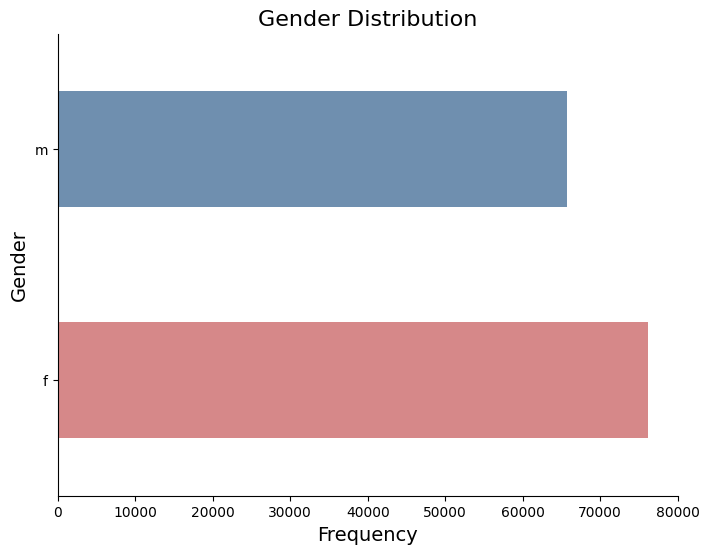

In [58]:
# Creating a horizontal bar plot for the Gender distribution in the data

gender_counts = df_with_antibiotics.groupby('Gender').size()

plt.figure(figsize=(8, 6))
gender_counts.plot(kind='barh', color=['#d68889', '#6F8FAF'])

plt.title('Gender Distribution', fontname='sans-serif', fontsize=16)

plt.xlabel('Frequency', fontname='sans-serif', fontsize=14)
plt.ylabel('Gender', fontname='sans-serif', fontsize=14)

plt.xticks(fontname='sans-serif', fontsize=10)
plt.yticks(fontname='sans-serif', fontsize=10)

# Removing top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.savefig('GenderDistribution.png', bbox_inches='tight')
plt.show()


## **Bacteria**

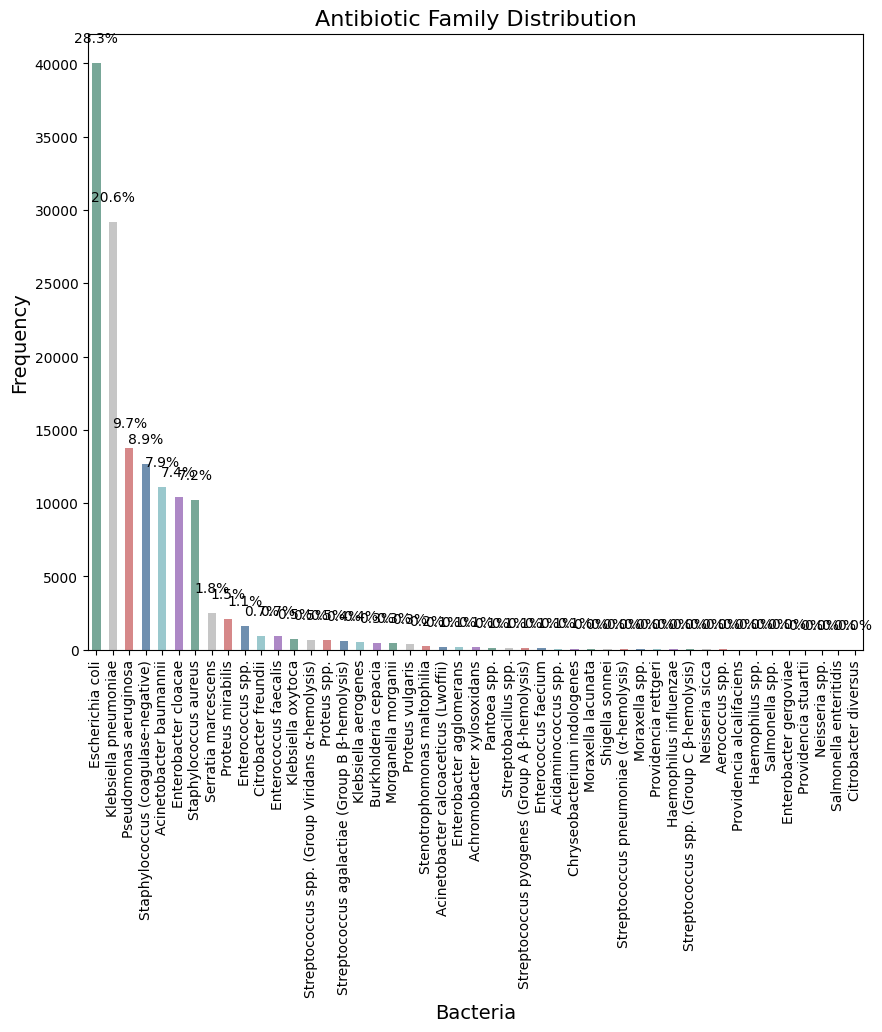

In [59]:
value_counts = df['Bacteria'].value_counts()
ax = value_counts.plot(kind='bar', figsize=(10, 8),color=[colorPalette[i % len(colorPalette)] for i in range(len(value_counts))])
total = len(df['Bacteria'])
for i, v in enumerate(value_counts):
    ax.text(i, v + total * 0.01, f'{(v / total) * 100:.1f}%', ha='center')
ax.set_title('Antibiotic Family Distribution', fontsize=16)
ax.set_xlabel('Bacteria', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
plt.show()

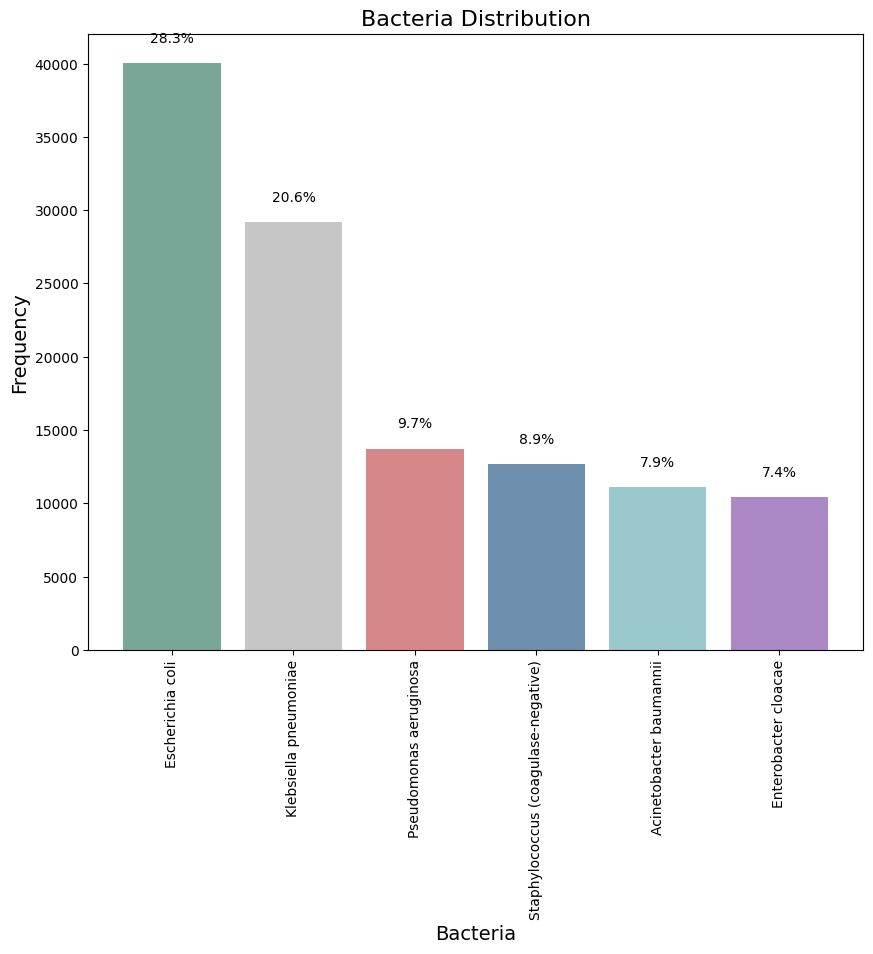

In [60]:
# Get the value counts of 'Bacteria'
value_counts = df['Bacteria'].value_counts()

top_6_bacteria = value_counts.nlargest(6)
fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.bar(top_6_bacteria.index, top_6_bacteria.values, color=colorPalette[:len(top_6_bacteria)])


total = len(df['Bacteria'])
for bar in bars:
    percentage = (bar.get_height() / total) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + total * 0.01, f'{percentage:.1f}%', ha='center')

ax.set_title('Bacteria Distribution', fontsize=16)
ax.set_xlabel('Bacteria', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
plt.xticks(rotation=90)
plt.show()


## **Antibiotic Family**

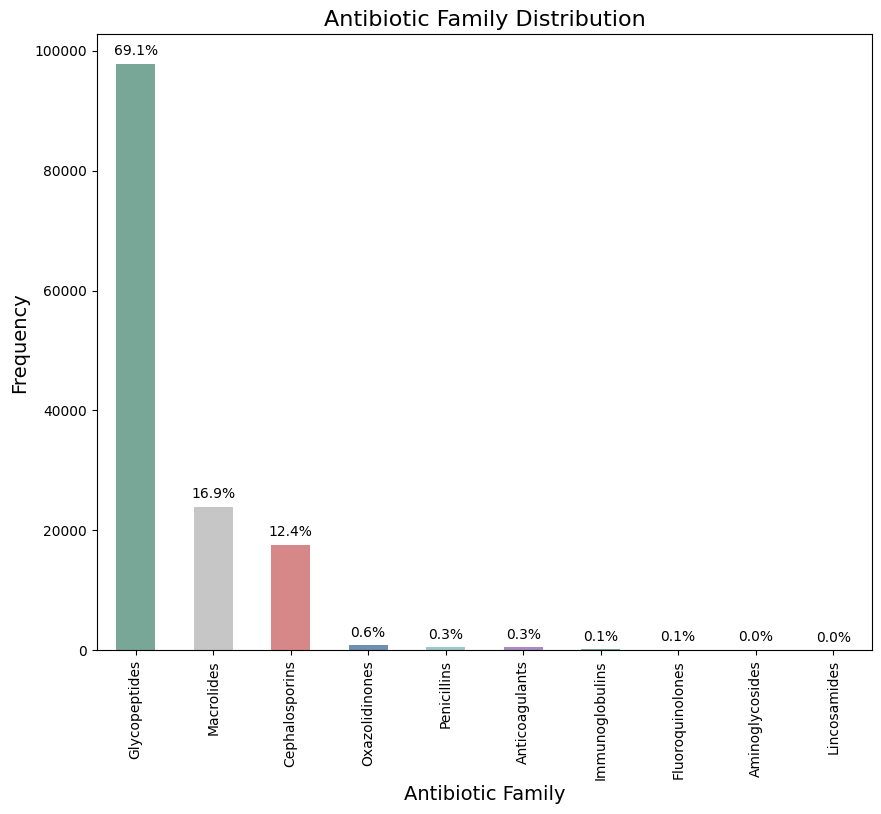

In [61]:
import matplotlib.pyplot as plt

value_counts = df['Antibiotic_Family'].value_counts()
ax = value_counts.plot(kind='bar', figsize=(10, 8),color=[colorPalette[i % len(colorPalette)] for i in range(len(value_counts))])
total = len(df['Antibiotic_Family'])
for i, v in enumerate(value_counts):
    ax.text(i, v + total * 0.01, f'{(v / total) * 100:.1f}%', ha='center')
ax.set_title('Antibiotic Family Distribution', fontsize=16)
ax.set_xlabel('Antibiotic Family', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
plt.show()


In [62]:
df['Antibiotic_Family'].value_counts()

Antibiotic_Family
Glycopeptides       97868
Macrolides          23942
Cephalosporins      17615
Oxazolidinones        817
Penicillins           488
Anticoagulants        481
Immunoglobulins       165
Fluoroquinolones       76
Aminoglycosides        70
Lincosamides           32
Name: count, dtype: int64

## **Sensitivity Result**

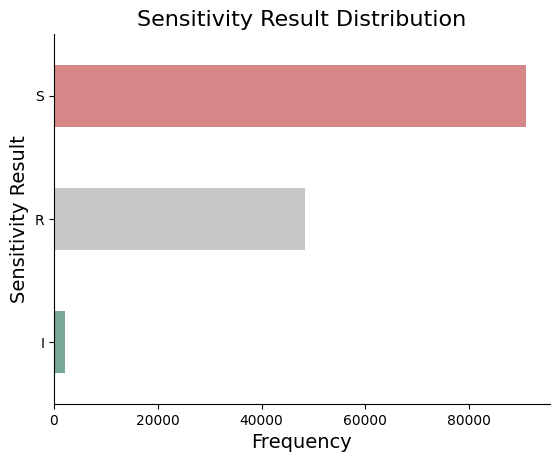

In [63]:
ax = df.groupby('SensitivityResult').size().plot(kind='barh', color=colorPalette)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title('Sensitivity Result Distribution', fontsize=16)
ax.set_xlabel('Frequency', fontsize=14)
ax.set_ylabel('Sensitivity Result', fontsize=14)
plt.show()

In [64]:
df=df.drop(df[df['SensitivityResult'] == 'I'].index)

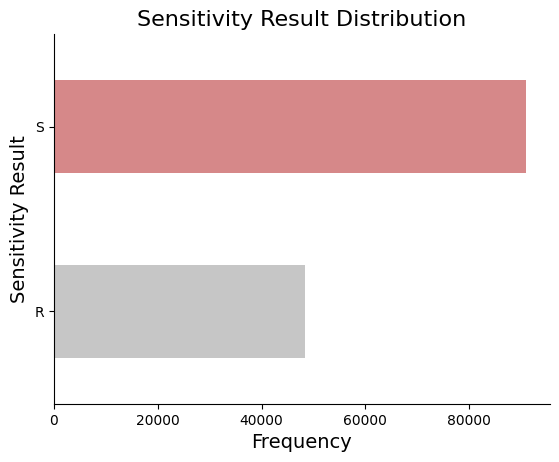

In [65]:
Scolors = [colorPalette[1], colorPalette[2]]
ax = df.groupby('SensitivityResult').size().plot(kind='barh', color=Scolors)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Sensitivity Result Distribution', fontsize=16)
ax.set_xlabel('Frequency', fontsize=14)
ax.set_ylabel('Sensitivity Result', fontsize=14)
plt.show()

## **Sensitivity Result by Bacteria**

In [66]:
bacteria_to_keep = ['Escherichia coli', 'Klebsiella pneumoniae', 'Pseudomonas aeruginosa', 'Staphylococcus (coagulase-negative)', 'Acinetobacter baumannii']
df2 = df[df['Bacteria'].isin(bacteria_to_keep)]

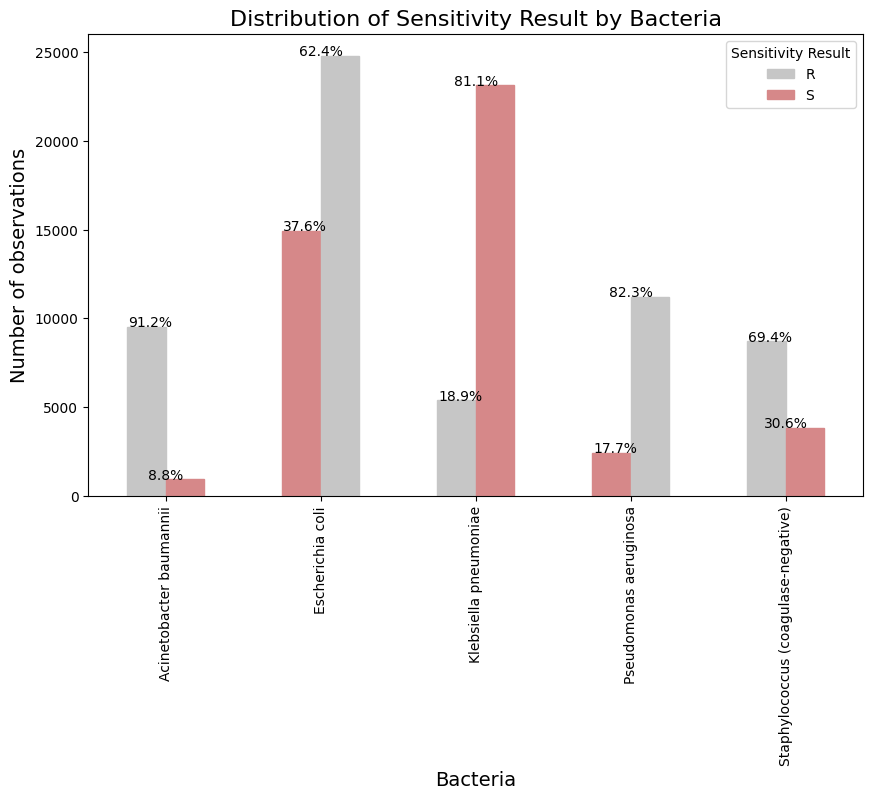

In [67]:
result_counts = df2.groupby(['Bacteria', 'SensitivityResult']).size().unstack()
result_percentages = result_counts.div(result_counts.sum(axis=1), axis=0) * 100

ax = result_counts.plot(kind='bar', figsize=(10, 6))
for i, bar in enumerate(ax.patches):
    if i % 2 == 0:
        bar.set_color(colorPalette[1])
    else:
        bar.set_color(colorPalette[2])

plt.xlabel('Bacteria', fontsize=14)
plt.ylabel('Number of observations', fontsize=14)
plt.title('Distribution of Sensitivity Result by Bacteria', fontsize=16)
plt.legend(title='Sensitivity Result')

for i in range(result_counts.shape[0]):
    for j in range(result_counts.shape[1]):
        plt.text(i + j * 0.1 - 0.1, result_counts.iloc[i, j] + 1, f'{result_percentages.iloc[i, j]:.1f}%', ha='center')
plt.show()

In [68]:
df['Antibiotic_Family'].value_counts()

Antibiotic_Family
Glycopeptides       96205
Macrolides          23847
Cephalosporins      17392
Oxazolidinones        679
Penicillins           488
Anticoagulants        481
Immunoglobulins       159
Fluoroquinolones       76
Aminoglycosides        70
Lincosamides           25
Name: count, dtype: int64

## **Bacteria with Antibiotic Family**

### **Escherichia coli**

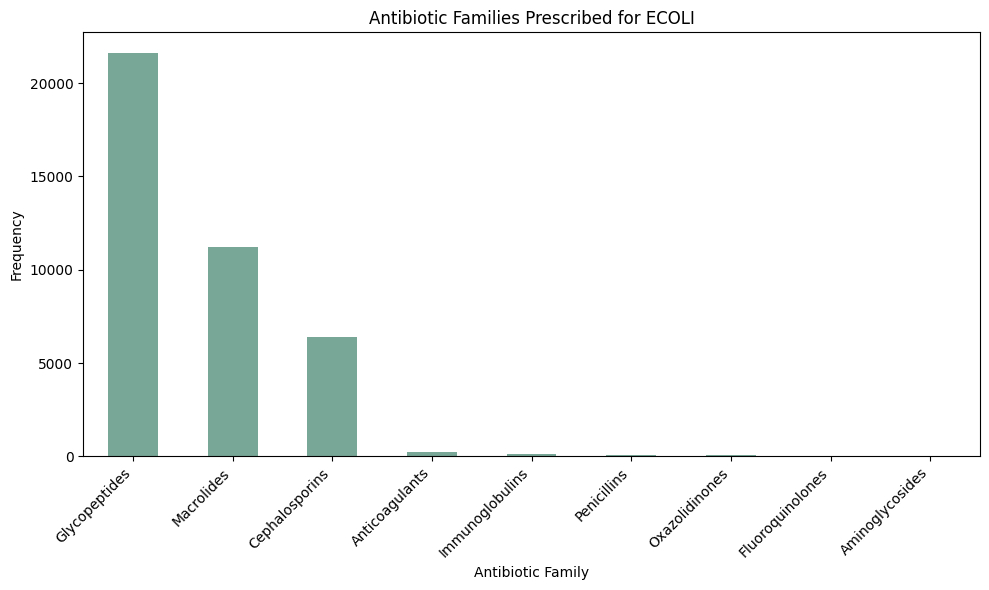

In [69]:
ECOLI_df = df[df['Bacteria'] == 'Escherichia coli']
AFCount = ECOLI_df['Antibiotic_Family'].value_counts()
plt.figure(figsize=(10, 6))
AFCount.plot(kind='bar', color=colorPalette[0])
plt.title('Antibiotic Families Prescribed for ECOLI')
plt.xlabel('Antibiotic Family')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [70]:
print(AFCount)

Antibiotic_Family
Glycopeptides       21640
Macrolides          11201
Cephalosporins       6408
Anticoagulants        213
Immunoglobulins       109
Penicillins            48
Oxazolidinones         45
Fluoroquinolones       40
Aminoglycosides        40
Name: count, dtype: int64


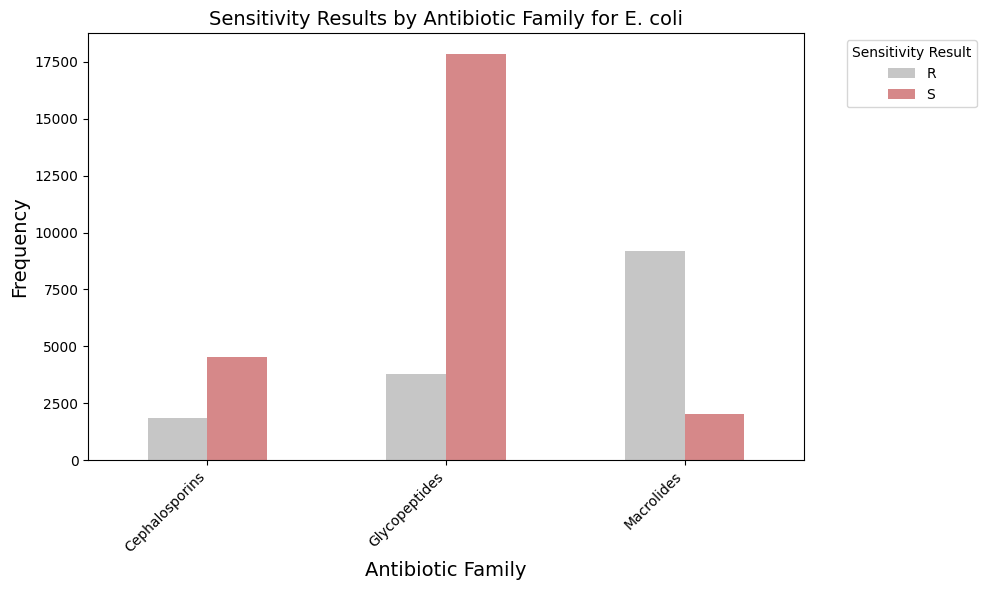

In [71]:
# Grouped by 'Antibiotic Family' and 'Sensitivity Result'
# and counted the occurences for a df filtered by Ecoli

DFS = df[df['Bacteria'] == 'Escherichia coli']
AF_to_keep = ['Glycopeptides', 'Macrolides', 'Cephalosporins']
DFS = DFS[DFS['Antibiotic_Family'].isin(AF_to_keep)]

result_counts = DFS.groupby(['Antibiotic_Family', 'SensitivityResult']).size().unstack(fill_value=0)

SColors = [colorPalette[1], colorPalette[2]]
result_counts.plot(kind='bar', figsize=(10, 6), color=SColors)

plt.xlabel('Antibiotic Family', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Sensitivity Results by Antibiotic Family for E. coli', fontsize=14)
plt.legend(title='Sensitivity Result', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Klebsiella pneumoniae**

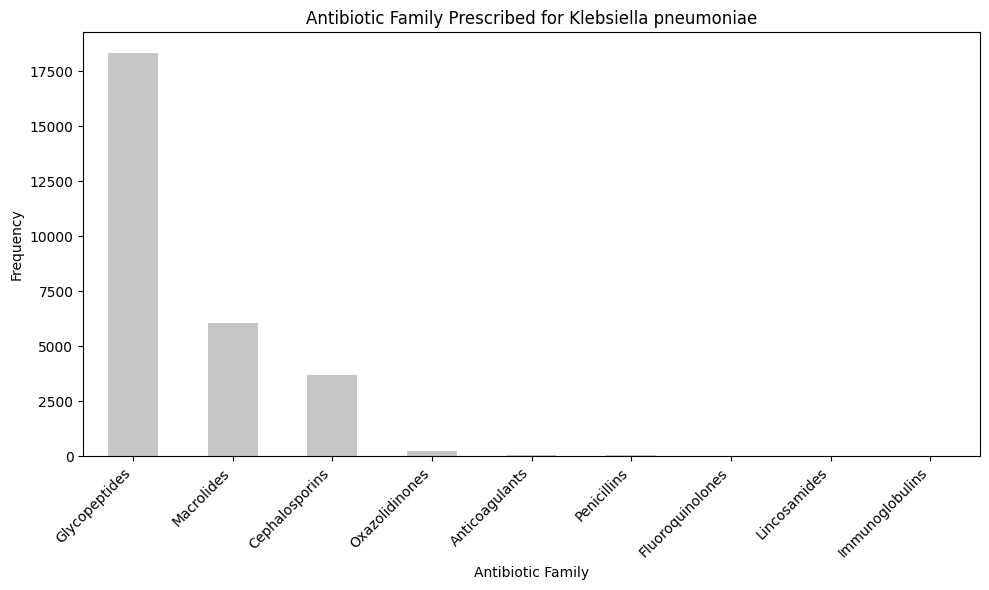

In [72]:
klebsi_df = df[df['Bacteria'] == 'Klebsiella pneumoniae']
AFCount = klebsi_df['Antibiotic_Family'].value_counts()
plt.figure(figsize=(10, 6))
AFCount.plot(kind='bar', color=colorPalette[1])
plt.title('Antibiotic Family Prescribed for Klebsiella pneumoniae')
plt.xlabel('Antibiotic Family')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [73]:
print(AFCount)

Antibiotic_Family
Glycopeptides       18347
Macrolides           6042
Cephalosporins       3711
Oxazolidinones        252
Anticoagulants         73
Penicillins            52
Fluoroquinolones       36
Lincosamides           18
Immunoglobulins         7
Name: count, dtype: int64


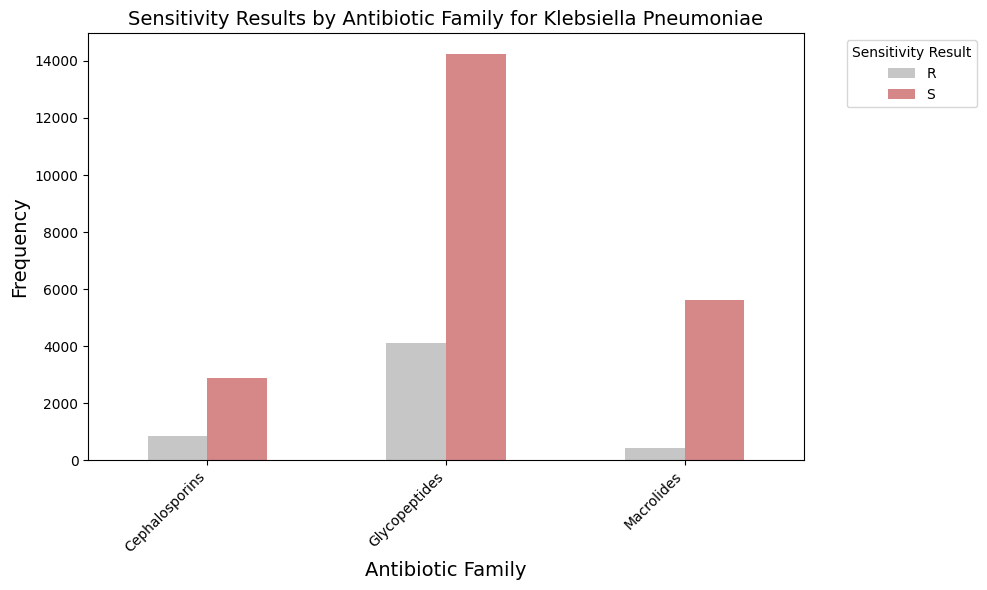

In [74]:
# Grouped by 'Antibiotic Family' and 'Sensitivity Result'
# and counted the occurences for a df filtered by Klebsiella

DFS2 = df[df['Bacteria'] == 'Klebsiella pneumoniae']
AF_to_keep = ['Glycopeptides', 'Macrolides', 'Cephalosporins']
DFS2 = DFS2[DFS2['Antibiotic_Family'].isin(AF_to_keep)]


result_counts = DFS2.groupby(['Antibiotic_Family', 'SensitivityResult']).size().unstack(fill_value=0)

SColors = [colorPalette[1], colorPalette[2]]
result_counts.plot(kind='bar', figsize=(10, 6), color=SColors)

plt.xlabel('Antibiotic Family', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Sensitivity Results by Antibiotic Family for Klebsiella Pneumoniae', fontsize=14)
plt.legend(title='Sensitivity Result', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Pseudomonas Aeruginosa**

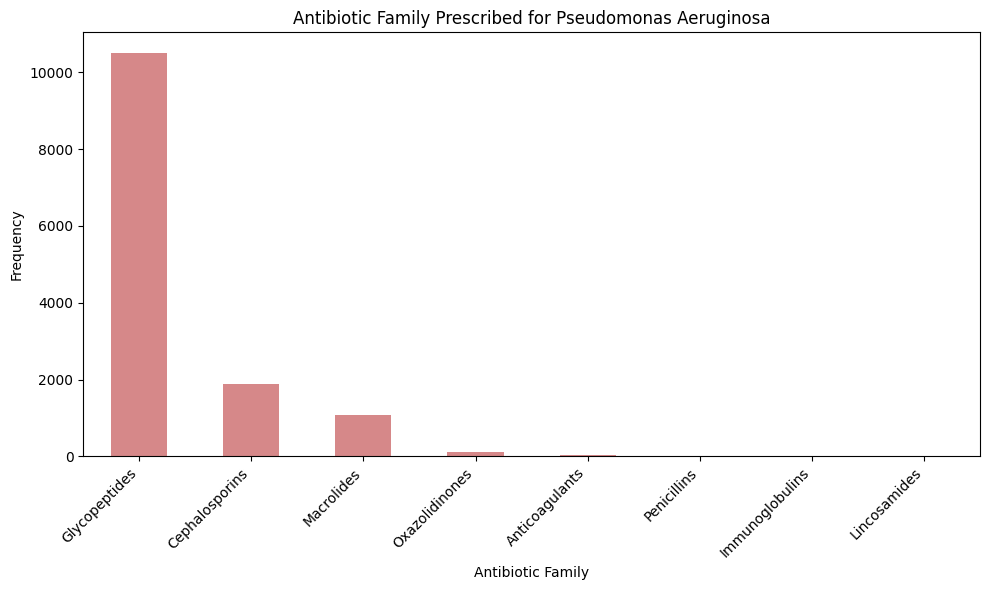

In [75]:
PA_df = df[df['Bacteria'] == 'Pseudomonas aeruginosa']
AFCount = PA_df['Antibiotic_Family'].value_counts()
plt.figure(figsize=(10, 6))
AFCount.plot(kind='bar', color=colorPalette[2])
plt.title('Antibiotic Family Prescribed for Pseudomonas Aeruginosa')
plt.xlabel('Antibiotic Family')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [76]:
print(AFCount)

Antibiotic_Family
Glycopeptides      10516
Cephalosporins      1872
Macrolides          1085
Oxazolidinones       114
Anticoagulants        27
Penicillins           12
Immunoglobulins       11
Lincosamides           7
Name: count, dtype: int64


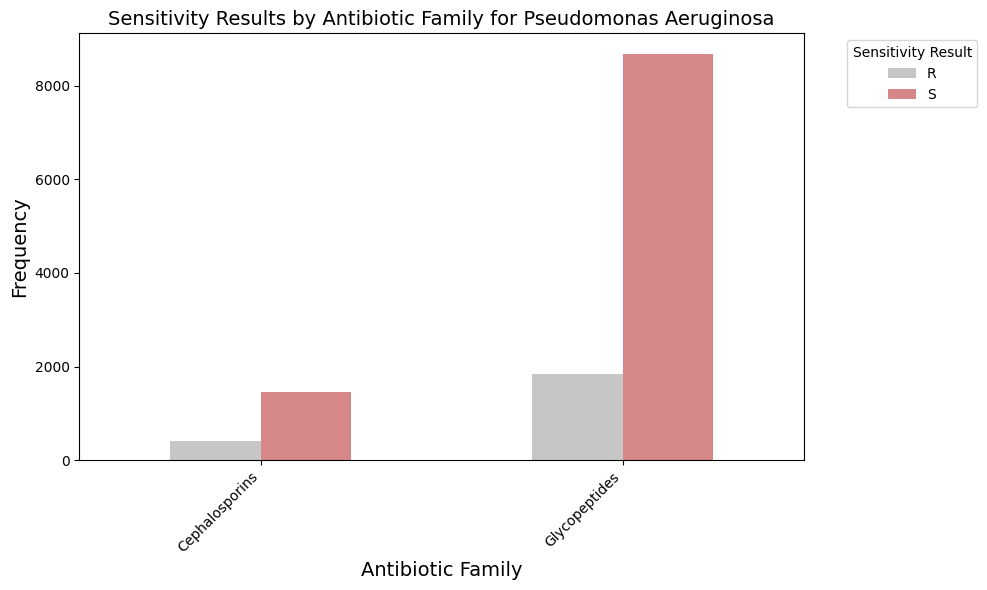

In [77]:
 # Grouped by 'Antibiotic Family' and 'Sensitivity Result'
 # and counted the occurences for a df filtered by Pseudomonas Aeruginosa

DFS3 = df[df['Bacteria'] == 'Pseudomonas aeruginosa']
AF_to_keep = ['Glycopeptides', 'Cephalosporins']
DFS3 = DFS3[DFS3['Antibiotic_Family'].isin(AF_to_keep)]


result_counts = DFS3.groupby(['Antibiotic_Family', 'SensitivityResult']).size().unstack(fill_value=0)

SColors = [colorPalette[1], colorPalette[2]]
result_counts.plot(kind='bar', figsize=(10, 6), color=SColors)

plt.xlabel('Antibiotic Family', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Sensitivity Results by Antibiotic Family for Pseudomonas Aeruginosa', fontsize=14)
plt.legend(title='Sensitivity Result', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Staphylococcus**

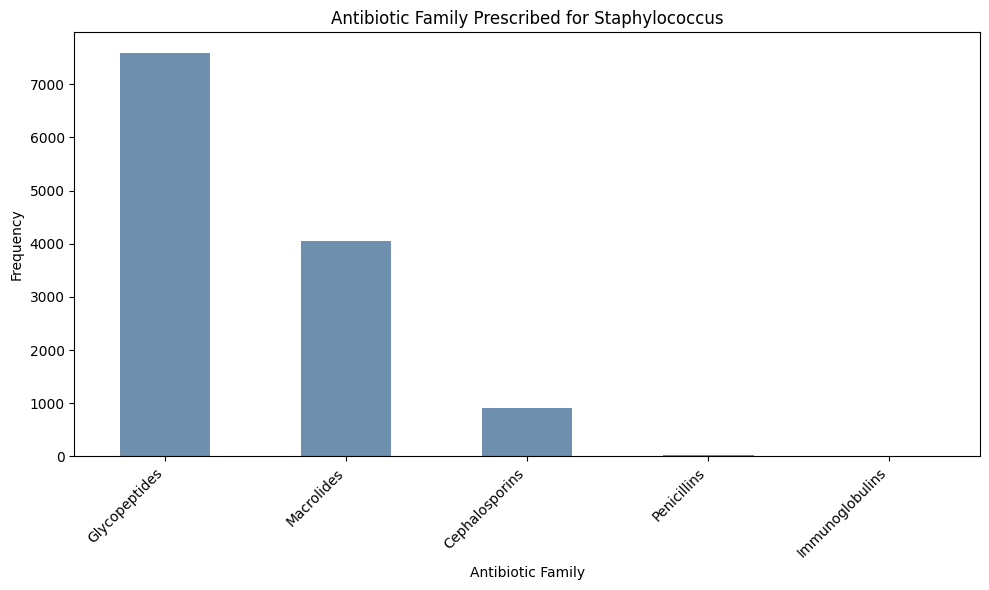

In [78]:
ST_df = df[df['Bacteria'] == 'Staphylococcus (coagulase-negative)']
AFCount = ST_df['Antibiotic_Family'].value_counts()
plt.figure(figsize=(10, 6))
AFCount.plot(kind='bar', color=colorPalette[3])
plt.title('Antibiotic Family Prescribed for Staphylococcus')
plt.xlabel('Antibiotic Family')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [79]:
print(AFCount)

Antibiotic_Family
Glycopeptides      7596
Macrolides         4045
Cephalosporins      907
Penicillins          16
Immunoglobulins      11
Name: count, dtype: int64


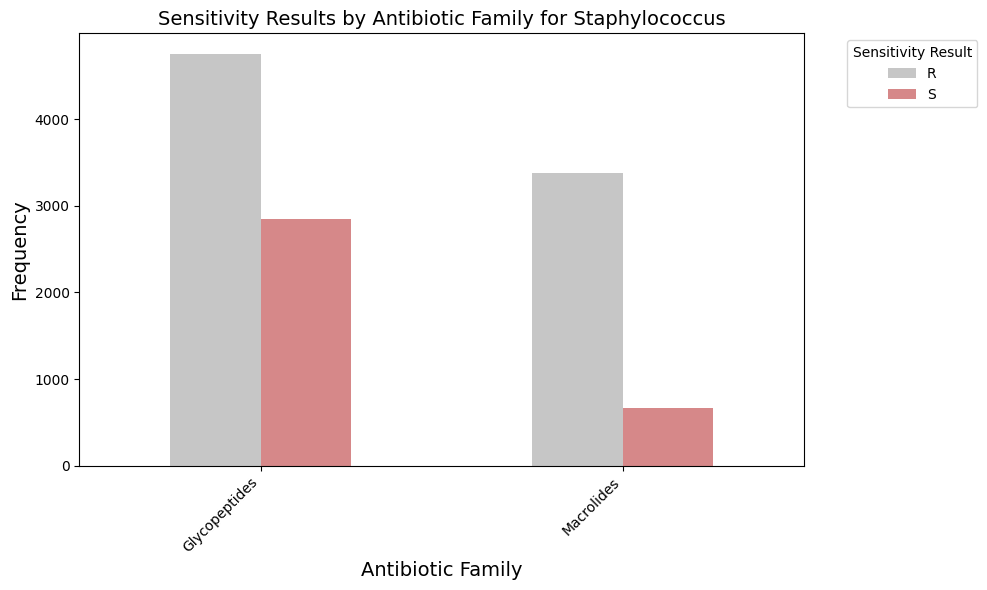

In [80]:
 # Grouped by 'Antibiotic Family' and 'Sensitivity Result'
 # and counted the occurences for a df filtered by Staphylococcus

DFS4 = df[df['Bacteria'] == 'Staphylococcus (coagulase-negative)']
AF_to_keep = ['Glycopeptides', 'Macrolides']
DFS4 = DFS4[DFS4['Antibiotic_Family'].isin(AF_to_keep)]


result_counts = DFS4.groupby(['Antibiotic_Family', 'SensitivityResult']).size().unstack(fill_value=0)

SColors = [colorPalette[1], colorPalette[2]]
result_counts.plot(kind='bar', figsize=(10, 6), color=SColors)

plt.xlabel('Antibiotic Family', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Sensitivity Results by Antibiotic Family for Staphylococcus', fontsize=14)
plt.legend(title='Sensitivity Result', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Acinetobacter baumannii**

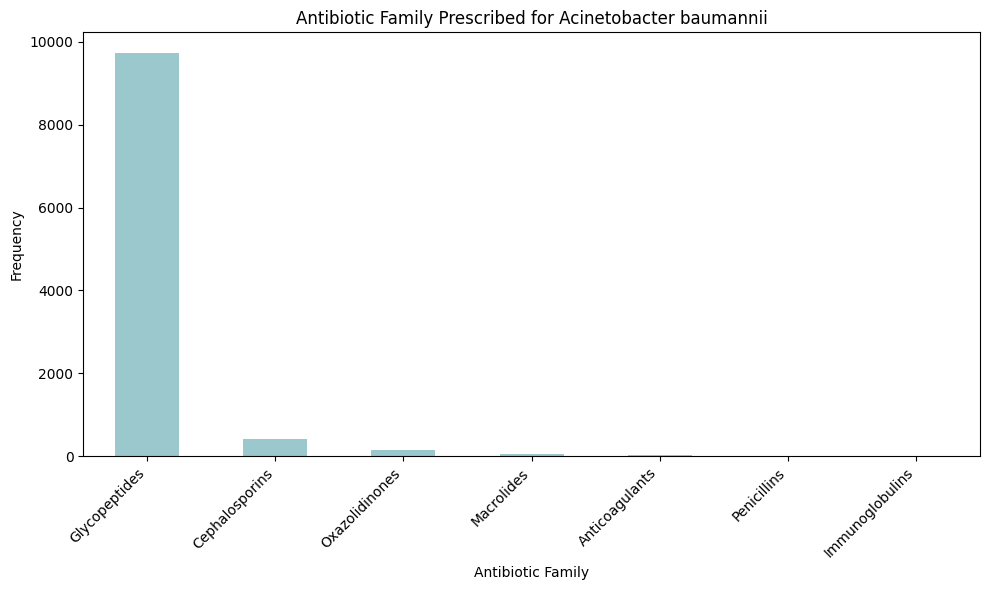

In [81]:
AB_df = df[df['Bacteria'] == 'Acinetobacter baumannii']
AFCount = AB_df['Antibiotic_Family'].value_counts()
plt.figure(figsize=(10, 6))
AFCount.plot(kind='bar', color=colorPalette[4])
plt.title('Antibiotic Family Prescribed for Acinetobacter baumannii')
plt.xlabel('Antibiotic Family')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [82]:
print(AFCount)

Antibiotic_Family
Glycopeptides      9739
Cephalosporins      424
Oxazolidinones      144
Macrolides           66
Anticoagulants       39
Penicillins          17
Immunoglobulins      16
Name: count, dtype: int64


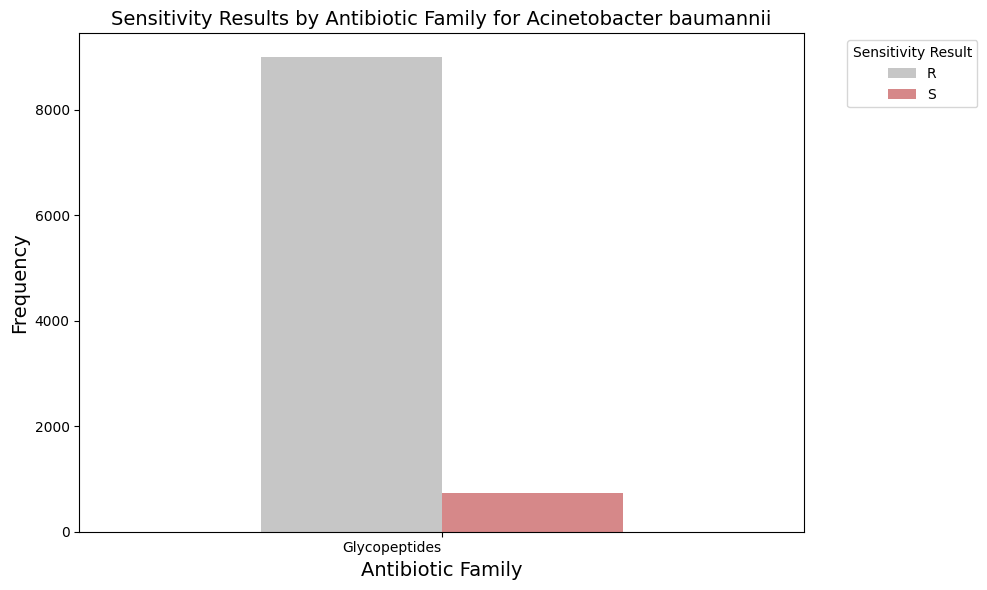

In [83]:
 # Grouped by 'Antibiotic Family' and 'Sensitivity Result'
 # and counted the occurences for a df filtered by Acinetobacter baumannii

DS5 = df[df['Bacteria'] == 'Acinetobacter baumannii']
AF_to_keep = ['Glycopeptides']
DS5 = DS5[DS5['Antibiotic_Family'].isin(AF_to_keep)]


result_counts = DS5.groupby(['Antibiotic_Family', 'SensitivityResult']).size().unstack(fill_value=0)

SColors = [colorPalette[1], colorPalette[2]]
result_counts.plot(kind='bar', figsize=(10, 6), color=SColors)

plt.xlabel('Antibiotic Family', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Sensitivity Results by Antibiotic Family for Acinetobacter baumannii', fontsize=14)
plt.legend(title='Sensitivity Result', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

## **Age and Sensitivity Result**

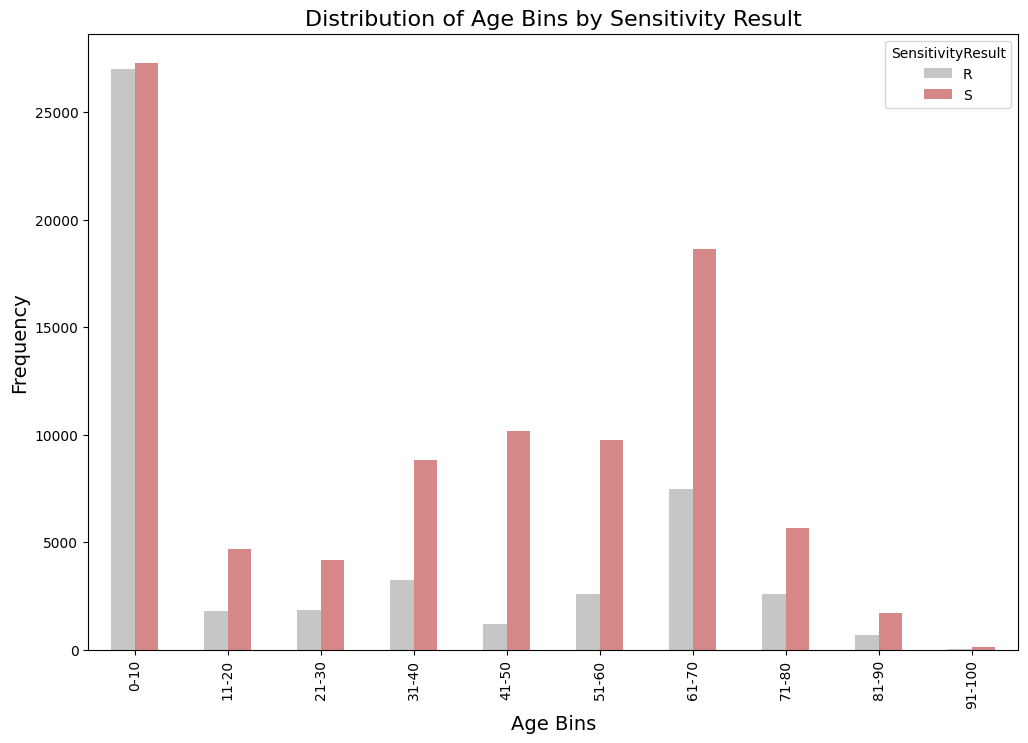

In [84]:
# Define bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Create a new column 'AgeBin' in the DataFrame for binning ages
df['AgeBin'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_sensitivity_crosstab = pd.crosstab(df['AgeBin'], df['SensitivityResult'])

colors = [colorPalette[1]]
age_sensitivity_crosstab.plot(kind='bar', figsize=(12, 8), stacked=False, color=Scolors)
plt.title('Distribution of Age Bins by Sensitivity Result', fontsize=16)
plt.xlabel('Age Bins', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='SensitivityResult')
plt.show()

  SensitivityResult        Age
0                 R  23.534851
1                 S  36.031110


<ipython-input-85-16c72f602431>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SensitivityResult', y='Age', data=age_summary, palette=Scolors)


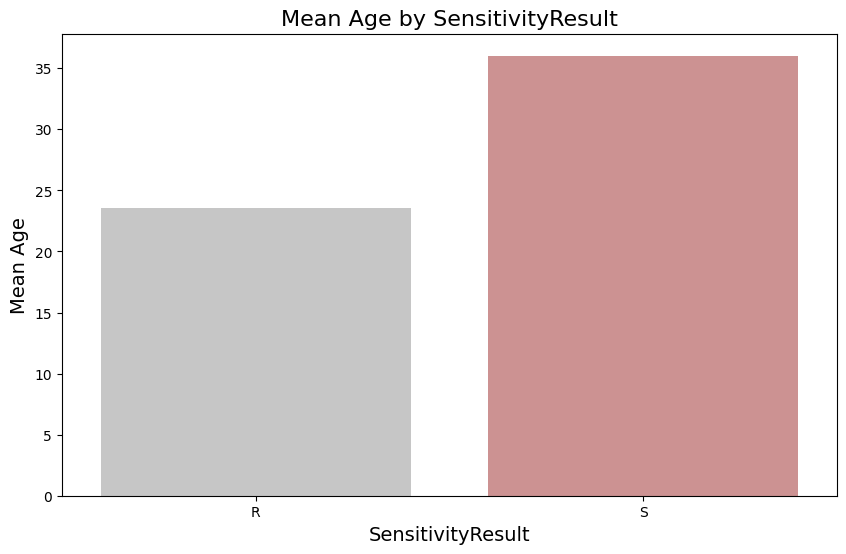

In [85]:
# Creating a bar plot
# Calculate the mean age for each category of SensitivityResult
age_summary = df.groupby('SensitivityResult')['Age'].mean().reset_index()

print(age_summary)

plt.figure(figsize=(10, 6))
sns.barplot(x='SensitivityResult', y='Age', data=age_summary, palette=Scolors)

plt.title('Mean Age by SensitivityResult', fontsize=16)
plt.xlabel('SensitivityResult', fontsize=14)
plt.ylabel('Mean Age', fontsize=14)
plt.show()


## **Sensitivity Results  in Cities**

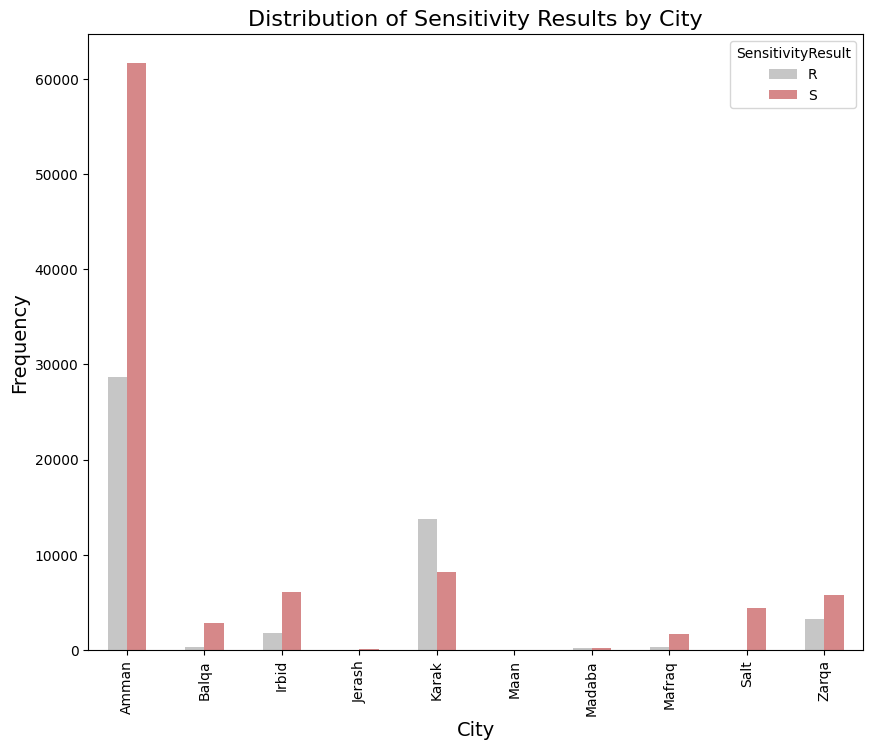

In [86]:
data_counts = pd.crosstab(df['City'], df['SensitivityResult'])
ax = data_counts.plot(kind='bar', figsize=(10, 8), stacked=False, color=Scolors)
plt.title('Distribution of Sensitivity Results by City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='SensitivityResult')
plt.show()


In [87]:
df=df.drop(['AgeBin'], axis=1)

In [88]:
df.to_excel('DataGP2.xlsx', index=False)

## **Correlation**

In [89]:
df.columns

Index(['PatientID', 'InsuranceType', 'Age', 'Gender', 'Bacteria',
       'SpecimenType', 'SensitivityResult', 'AdmissionPeriod', 'Hospital',
       'DiagnosisDateTime', 'Antibiotics', 'AdministrationMethod', 'Dosage',
       'Prescription', 'StartDate', 'End date', 'TreatmentTime',
       'Antibiotic_Family', 'City'],
      dtype='object')

In [90]:
label_encoder = LabelEncoder()
df3 = df.applymap(str)
for col in df3.columns:
    if df3[col].dtype == 'object':
        label_encoder = LabelEncoder()
        df3[col] = label_encoder.fit_transform(df3[col])

In [91]:
correlation_matrix = df3.corr()
sensitivity_correlations = correlation_matrix["SensitivityResult"]
print("Correlations of 'Sensitivity Result' with other columns:")
print(sensitivity_correlations)


Correlations of 'Sensitivity Result' with other columns:
PatientID              -0.035993
InsuranceType           0.041482
Age                     0.190639
Gender                 -0.144828
Bacteria                0.101794
SpecimenType            0.081474
SensitivityResult       1.000000
AdmissionPeriod         0.058815
Hospital                0.015243
DiagnosisDateTime       0.073257
Antibiotics             0.162327
AdministrationMethod   -0.204171
Dosage                 -0.088525
Prescription           -0.024490
StartDate               0.113944
End date                0.114081
TreatmentTime           0.023339
Antibiotic_Family      -0.191104
City                   -0.046241
Name: SensitivityResult, dtype: float64
